### описание данных

Датасеты:
    - grlist_2 : List of groups and their parameters detected in 2MRS (31506 rows)
    - grlist_s : List of groups and their parameters detected in SDSS DR12 (229893 rows)
    - galist_2 : List of 2MRS galaxies used, as well as their IDs and coordinates (43425 rows)
    - galist_s : List of SDSS galaxies used, as well as their IDs and coordinates (402439 rows)

Признаки:
1. grlist_2, grlist_s

    <b>iGrID</b> - Internal 2MRS or SDSS group ID
    
    <b>RAJ2000</b> - Right ascension (J2000.0) of the group centre
    
    <b>DEJ2000</b> - Declination (J2000.0) of the group centre
    
    <b>z</b> : Redshift of the group centre (CMB-corrected)
    
    <b>logLtot</b> - logarithm of the total (extrapolated) luminosity of the group
    
    <b>e_logLtot</b> - Uncertainty of total luminosity
    
    <b>logLobs</b> - logarithm of the observed luminosity of the group
    
    <b>logMtot</b> - logarithm of the total mass of the group
    
    <b>e_logMtot</b> - Uncertainty of the total mass
    
    <b>logMsta</b> - logarithm of the minimal stellar mass
    
    <b>NMstar</b> - Number of galaxies in the group for which stellar masses are available
    
    <b>logMdyn</b> - logarithm of the dynamical mass of the group
    
    <b>sigma</b> - Velocity dispersion of the group 
    
    <b>Rad</b> - Radius of the group
    
    <b>angRad</b> - Angular radius of the group
    
    <b>DL</b> - Luminosity distance to the group (redshift based)
    
    <b>Ntot</b> - Total number of galaxies in the group
    
    <b>Dist</b> - Display all distances


2. galist_2, galist_s

    <b>iGalID</b> - Internal 2MRS or SDSS galaxy ID

    <b>iGrID</b> - Internal 2MRS or SDSS group ID
    
    <b>Name</b> - 2MASS name (HHMMSSss+DDMMSSs) or DR12 Object ID number
    
    <b>RAJ2000</b> - Right ascension (J2000.0)
    
    <b>DEJ2000</b> - Declination (J2000.0)
    
    <b>z</b> - Redshift (CMB-corrected)
    
    <b>logMstar	</b> -  logarithm of the stellar mass
    
    <b>Dist</b> - Display all distances
    

### подготовка данных

In [1]:
import pandas as pd

ga_2, gr_2 = pd.read_csv('Data/galist_2.csv'), pd.read_csv('Data/grlist_2.csv')
ga_s, gr_s = pd.read_csv('Data/galist_s.csv'), pd.read_csv('Data/grlist_s.csv')

# объединение по iGrID
g_2, g_s = pd.merge(ga_2, gr_2, on='iGrID'), pd.merge(ga_s, gr_s, on='iGrID')

# фильтрация по Ntot
g_2, g_s = g_2[g_2.Ntot > 30], g_s[g_s.Ntot > 30]

In [2]:
g_2.head(3)

iGalID  iGrID                  Name  RAJ2000_x  DEJ2000_x       z_x  \
68   15983   1069      02570921+0519153  44.288391    5.32091  0.024036   
69   41930   1069      02533752+0603392  43.406349    6.06101  0.024890   
70   34664   1069      02574211+0525562  44.425579    5.43222  0.024612   

    logMstar_x  RAJ2000_y  DEJ2000_y       z_y  ...   logLobs   logMtot  \
68    11.04765  44.423199    6.02693  0.023551  ...  12.46836  14.44997   
69         NaN  44.423199    6.02693  0.023551  ...  12.46836  14.44997   
70         NaN  44.423199    6.02693  0.023551  ...  12.46836  14.44997   

    logMstar_y  NMstar  logMdyn     sigma       Rad    angRad       DL  Ntot  
68    11.73111       4  12.0069  489.3147  608.5851  0.370252  98.6641    32  
69    11.73111       4  12.0069  489.3147  608.5851  0.370252  98.6641    32  
70    11.73111       4  12.0069  489.3147  608.5851  0.370252  98.6641    32  

[3 rows x 21 columns]

In [3]:
g_s.head(3)

iGalID  iGrID                 Name  RAJ2000_x  DEJ2000_x       z_x  \
1188  151723  82182  1237661121851687040  50.787243  40.294140  0.014498   
1189  148781  82182  1237661121851687044  50.792912  40.299427  0.013492   
1190  151724  82182  1237661121851687072  50.852291  40.355141  0.016187   

      logMstar_x Dist_x  RAJ2000_y  DEJ2000_y  ...   logMtot  logMstar_y  \
1188         NaN         49.179073  41.324898  ...  14.77303         NaN   
1189         NaN         49.179073  41.324898  ...  14.77303         NaN   
1190         NaN         49.179073  41.324898  ...  14.77303         NaN   

      NMstar  logMdyn    sigma       Rad    angRad       DL  Ntot  Dist_y  
1188       0  12.5893  834.796  799.3362  0.701477  67.4165   141          
1189       0  12.5893  834.796  799.3362  0.701477  67.4165   141          
1190       0  12.5893  834.796  799.3362  0.701477  67.4165   141          

[3 rows x 23 columns]

In [4]:
# посмотреть немного статистики по данным

display(g_2.describe())
display(g_s.describe())

iGalID        iGrID    RAJ2000_x    DEJ2000_x          z_x  \
count   1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean   13029.473333   298.672500   150.488053    -3.712601     0.013659   
std    11901.388834   266.938895    79.438267    34.563430     0.006955   
min        7.000000     6.000000    16.392521   -64.527550     0.000281   
25%     2671.000000    47.000000    51.325588   -34.125901     0.007835   
50%     9290.000000   298.000000   185.081024     5.876205     0.014399   
75%    20928.500000   396.000000   195.184319    27.984790     0.017572   
max    43480.000000  1069.000000   283.264252    53.374519     0.033340   

       logMstar_x    RAJ2000_y    DEJ2000_y          z_y      logLtot  \
count  425.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean    10.580530   150.719259    -2.935033     0.013660    12.734151   
std      0.677955    79.490923    35.085043     0.006738     0.322944   
min      8.147910    16.853960   -63.331162     0.003218    11.854760   
25%     10.193810    54.716320   -33.978390     0.004935    12.521770   
50%     10.736200   187.996735    10.223670     0.014987    12.780630   
75%     11.041120   195.033783    27.976980     0.017071    12.999300   
max     11.958580   281.825592    53.374519     0.029517    13.157230   

           logLobs      logMtot   logMstar_y       NMstar      logMdyn  \
count  1200.000000  1200.000000  1165.000000  1200.000000  1200.000000   
mean     12.670164    14.539242    11.931288    21.795000    12.211932   
std       0.307684     0.362063     0.597534    20.546933     0.374541   
min      11.845410    13.682350    11.038630     0.000000    11.463700   
25%      12.447310    14.300780    11.493860     9.000000    11.906800   
50%      12.720990    14.585580    11.866610    15.000000    12.246600   
75%      12.970480    14.799260    12.518830    30.000000    12.565000   
max      12.999040    15.017640    12.960800    78.000000    12.632900   

             sigma          Rad       angRad           DL         Ntot  
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000  
mean    628.834650   746.916678     1.353421    56.919259    84.806667  
std     229.059803   338.602941     1.559747    28.340068    59.721072  
min     215.730100   332.575400     0.279702    13.260700    31.000000  
25%     442.590100   473.820300     0.418290    20.363900    38.000000  
50%     634.792900   645.494700     0.627055    62.346500    67.000000  
75%     751.231000   737.958200     1.336493    71.137900   104.000000  
max    1064.260100  1395.529100     6.046008   124.264600   205.000000

iGalID          iGrID          Name     RAJ2000_x     DEJ2000_x  \
count   30539.000000   30539.000000  3.053900e+04  30539.000000  30539.000000   
mean   196333.526212   91702.056583  1.237662e+18    188.658560     22.934135   
std    106196.118939   57252.884172  5.666487e+12     66.125503     18.008035   
min        56.000000      51.000000  1.237649e+18      2.790619    -11.167540   
25%    101984.500000   39456.000000  1.237658e+18    166.981033      7.672005   
50%    203205.000000   93444.000000  1.237662e+18    197.003250     21.690599   
75%    284073.500000  149469.000000  1.237666e+18    230.307259     34.141981   
max    402479.000000  204981.000000  1.237680e+18    359.164001     67.261467   

                z_x    logMstar_x     RAJ2000_y     DEJ2000_y           z_y  \
count  30539.000000  28478.000000  30539.000000  30539.000000  30539.000000   
mean       0.058758     10.297532    188.635855     22.910453      0.058734   
std        0.024423      0.662328     66.141581     18.044804      0.024356   
min        0.001380      6.770300      2.938612    -10.419022      0.006287   
25%        0.037569      9.853205    166.955505      7.556815      0.037231   
50%        0.059519     10.359855    197.113678     21.672550      0.059250   
75%        0.078521     10.779632    230.217697     34.362782      0.078571   
max        0.109990     12.127770    358.889954     67.128700      0.107968   

       ...       logLobs       logMtot    logMstar_y        NMstar  \
count  ...  30539.000000  30539.000000  30282.000000  30539.000000   
mean   ...     12.108564     14.712203     12.526057    128.066407   
std    ...      0.359229      0.405102      0.446781    190.083891   
min    ...     10.691020     13.782890      8.590060      0.000000   
25%    ...     11.854010     14.409620     12.280610     40.000000   
50%    ...     12.091950     14.706310     12.532380     62.000000   
75%    ...     12.317670     14.952080     12.788960    111.000000   
max    ...     12.977930     15.658700     13.397200    891.000000   

            logMdyn         sigma           Rad        angRad            DL  \
count  30539.000000  30539.000000  30539.000000  30539.000000  30539.000000   
mean      12.236848    549.479665   1031.354200      0.332911    255.557133   
std        0.422468    206.033512    487.507248      0.310541    110.295446   
min       11.194500    182.603900    268.500900      0.067928     25.968600   
25%       11.922700    399.817900    693.488100      0.174268    157.744700   
50%       12.211500    518.201800    908.426000      0.236301    255.671100   
75%       12.536600    648.540600   1214.333700      0.334553    344.584300   
max       13.235900   1534.589600   2712.226300      2.669756    485.498700   

               Ntot  
count  30539.000000  
mean     135.372835  
std      191.567370  
min       31.000000  
25%       44.000000  
50%       65.000000  
75%      120.000000  
max      896.000000  

[8 rows x 21 columns]

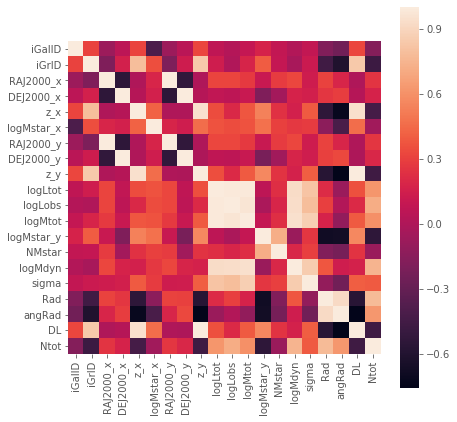

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn
plt.style.use('ggplot')

# корреляция между признаками (2MRS)
plt.figure(figsize=(7,7))
_ = seaborn.heatmap(g_2.corr(), square=True)
plt.show()

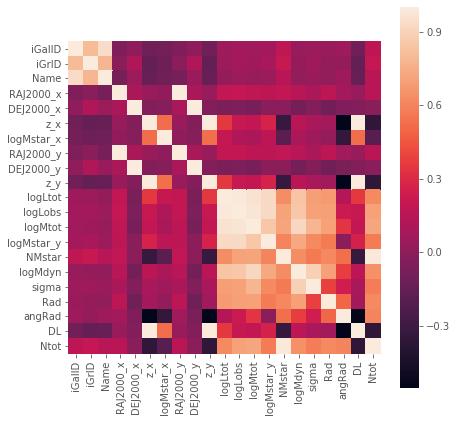

In [6]:
# корреляция между признаками (SDSS)
plt.figure(figsize=(7,7))
_ = seaborn.heatmap(g_s.corr(), square=True)
plt.show()

### визуализация данных

In [7]:
# уникальные группы
g_ids = g_2.iGrID.unique()
len(g_ids)

21

$$ \gamma \simeq \sqrt{(\alpha_1 - \alpha_2)\cos (\sigma_1)^2 + (\sigma_1 - \sigma_2)}$$

$\alpha$ - right ascension, $\sigma$ - declination

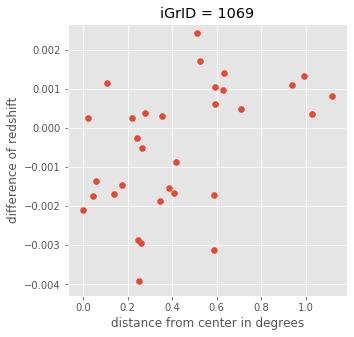

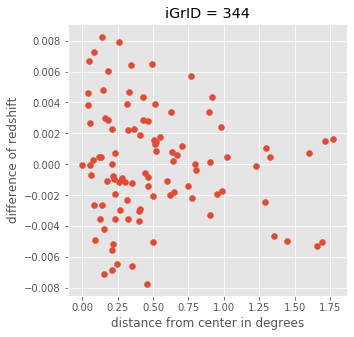

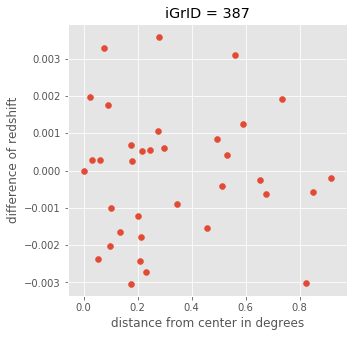

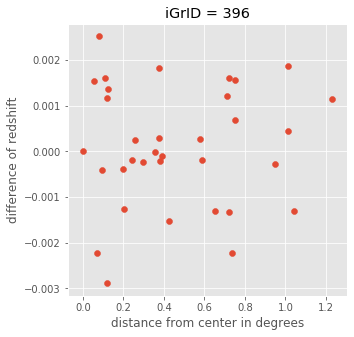

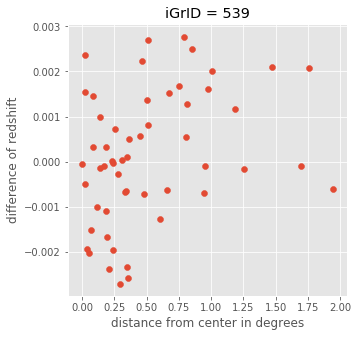

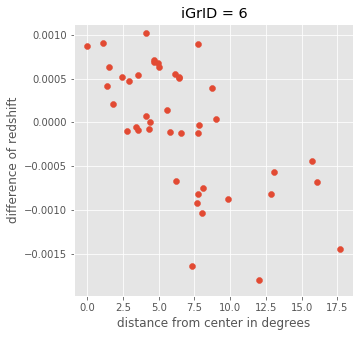

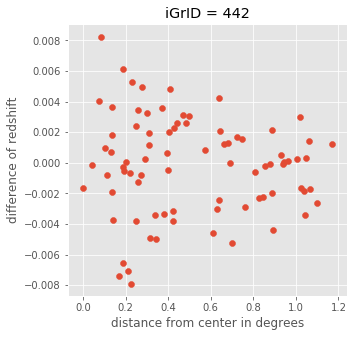

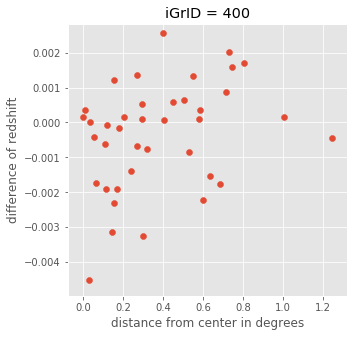

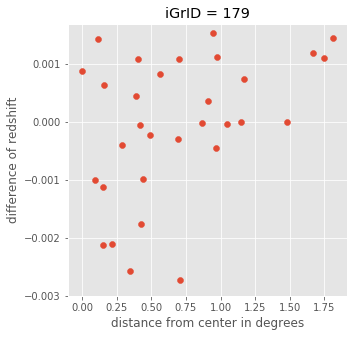

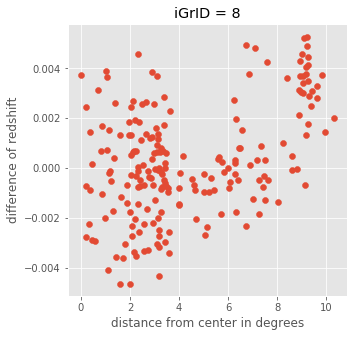

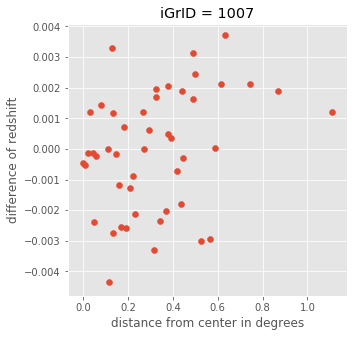

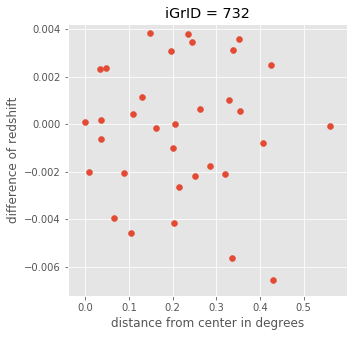

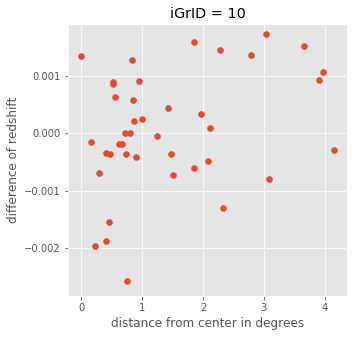

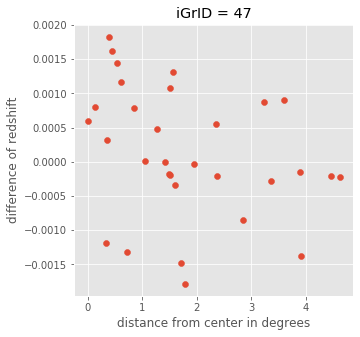

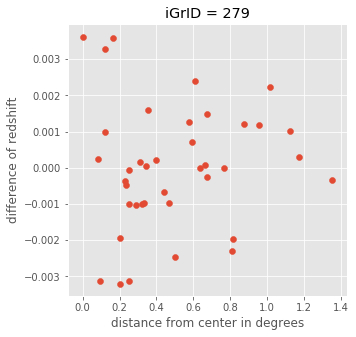

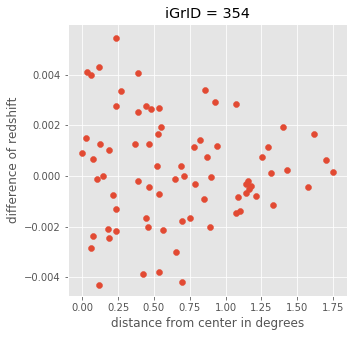

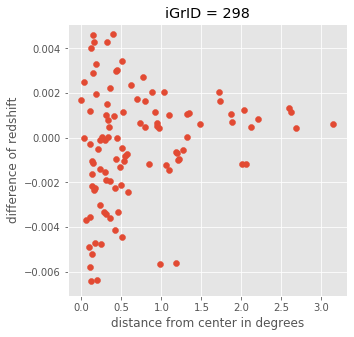

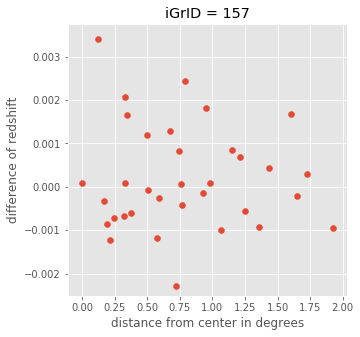

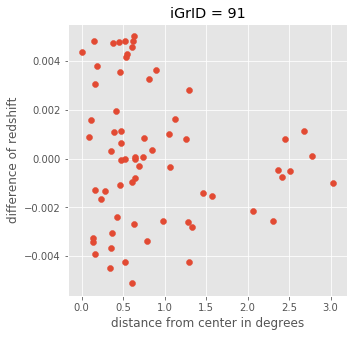

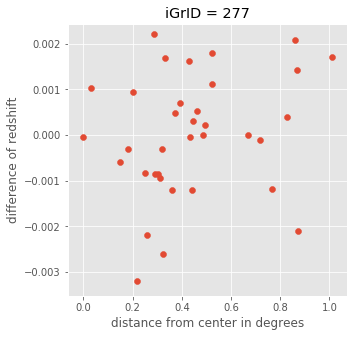

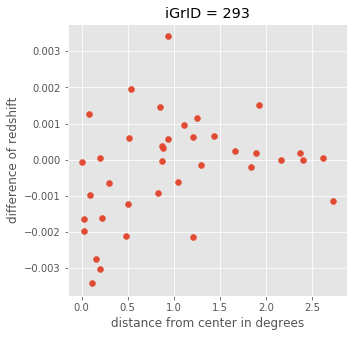

In [8]:
for i in range(len(g_ids)):
    cur_group = g_2[g_2['iGrID'] == g_ids[i]]
    d = np.sqrt(((cur_group.RAJ2000_x - cur_group.RAJ2000_y)*(np.cos(cur_group.DEJ2000_x)))**2 + (cur_group.DEJ2000_x - cur_group.DEJ2000_y)**2)
    d_z = cur_group.z_x - cur_group.z_y
    plt.figure(figsize=(5,5))
    plt.scatter(d, d_z)
    plt.xlabel('distance from center in degrees')
    plt.ylabel('difference of redshift')
    plt.title('iGrID = %d' % (g_ids[i]))
    plt.ylim(top=max(d_z)*1.1, bottom=min(d_z)*1.1)
    plt.show()

In [9]:
# уникальные группы
g_ids = g_s.iGrID.unique()
len(g_ids)

479

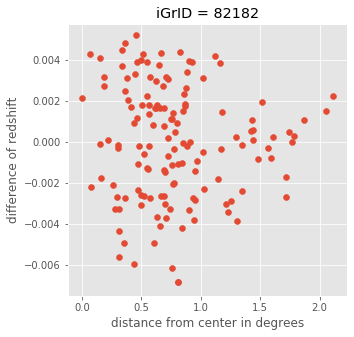

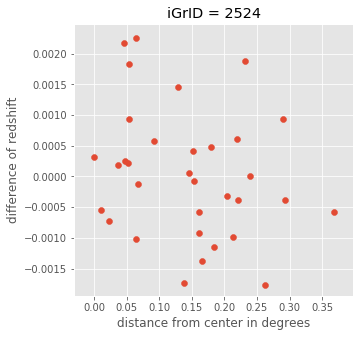

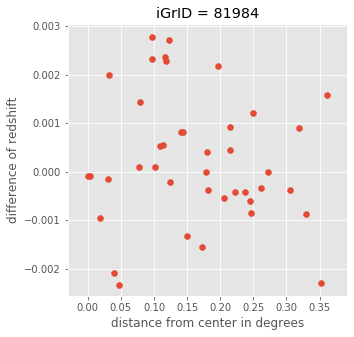

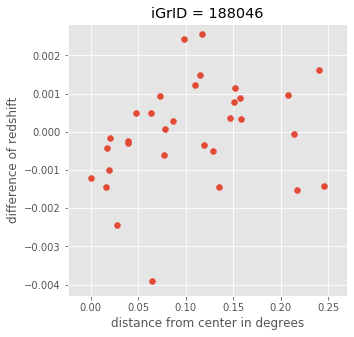

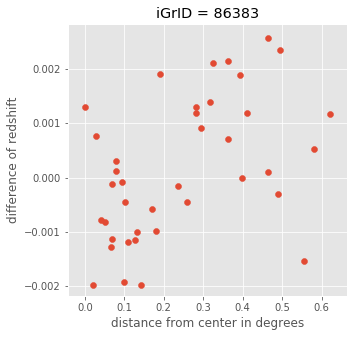

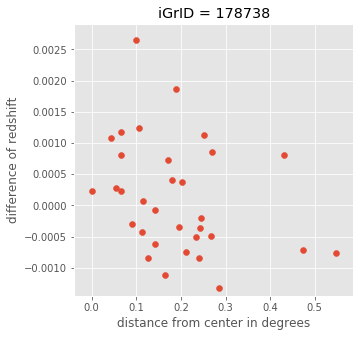

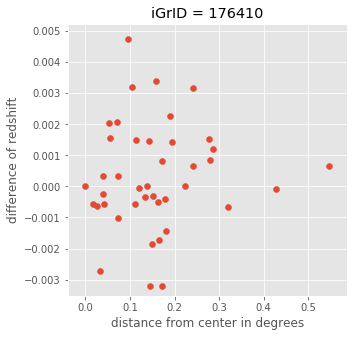

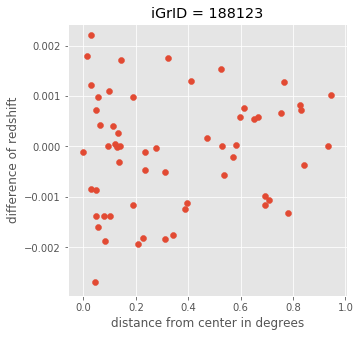

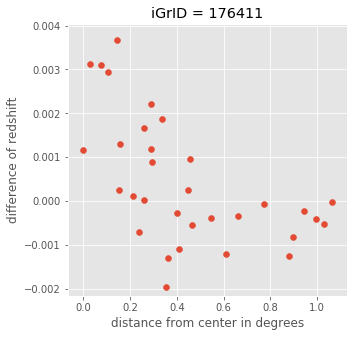

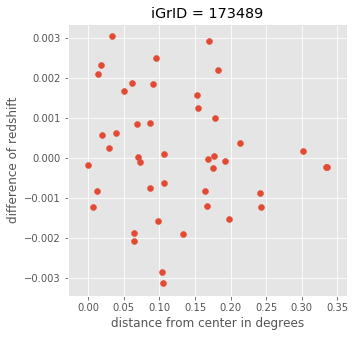

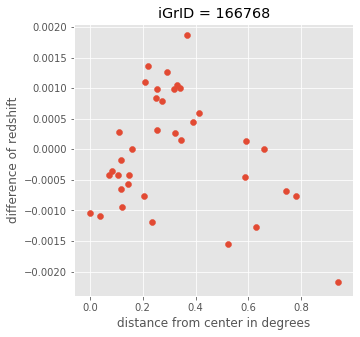

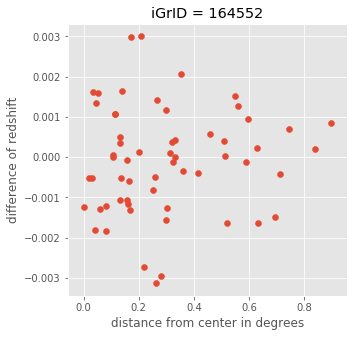

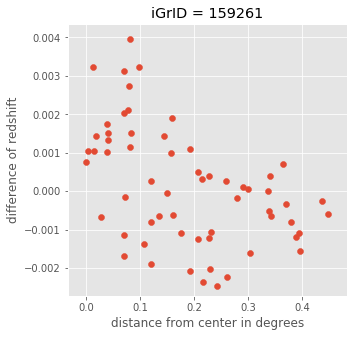

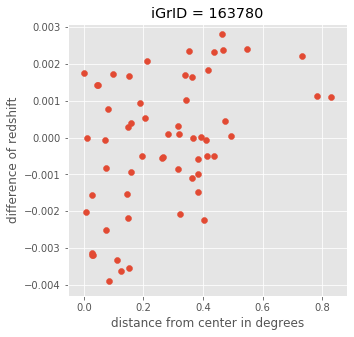

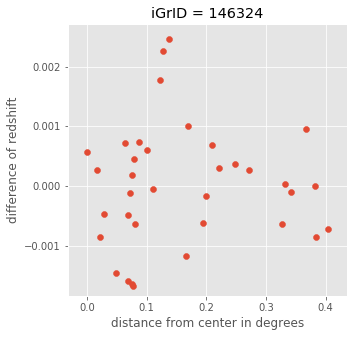

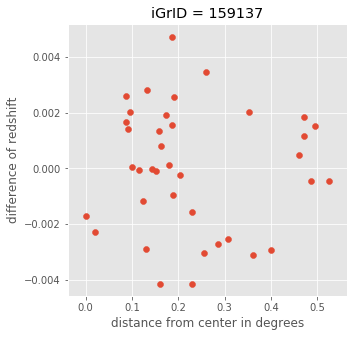

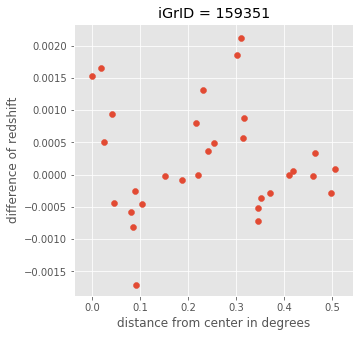

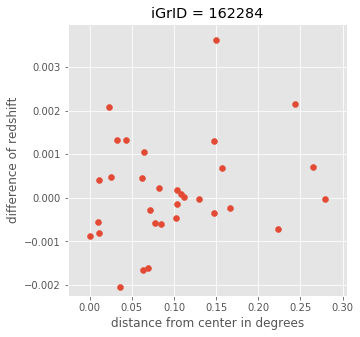

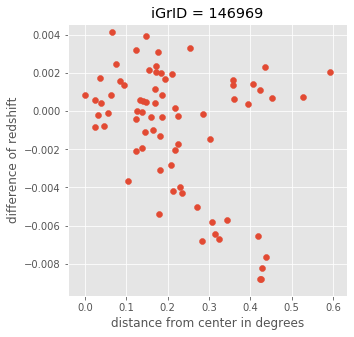

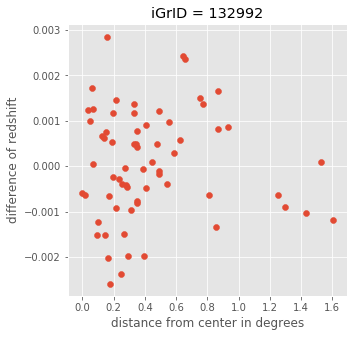

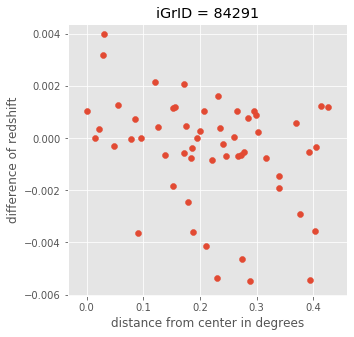

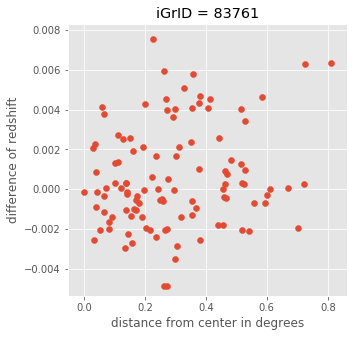

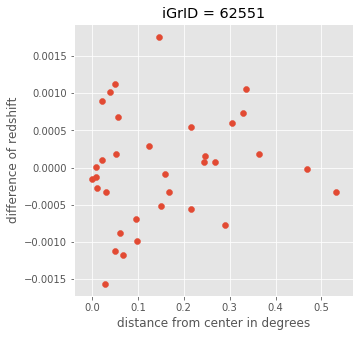

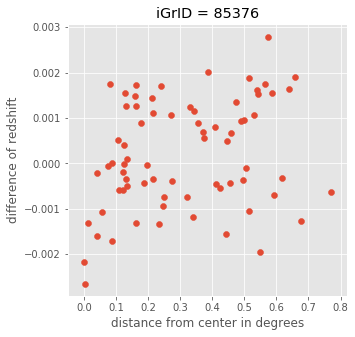

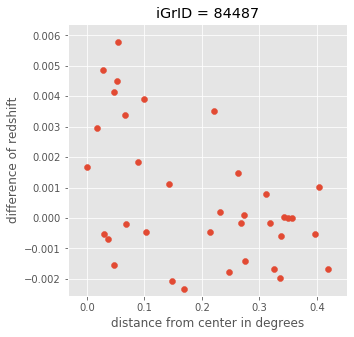

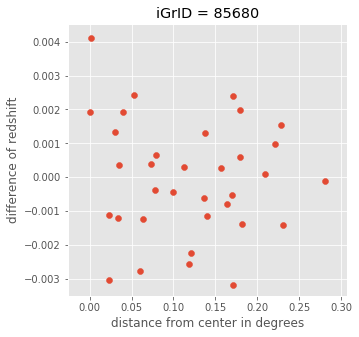

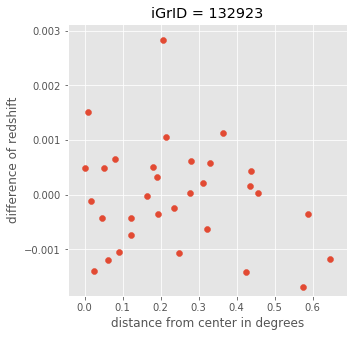

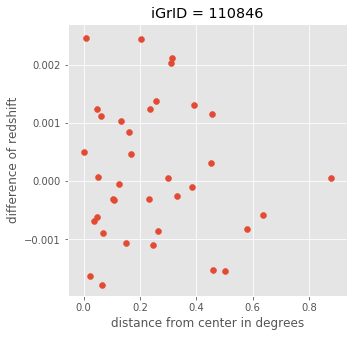

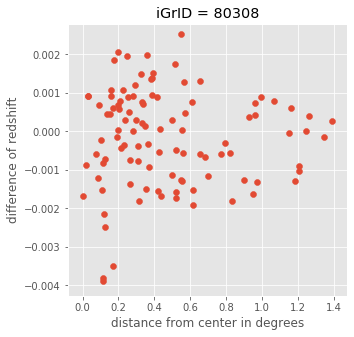

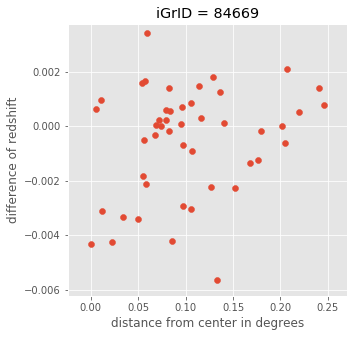

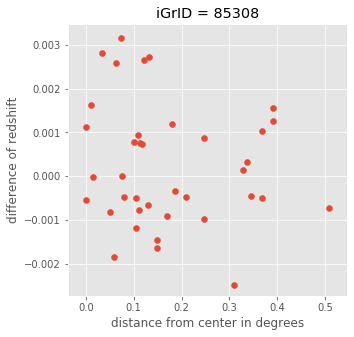

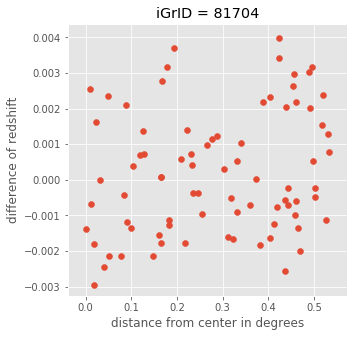

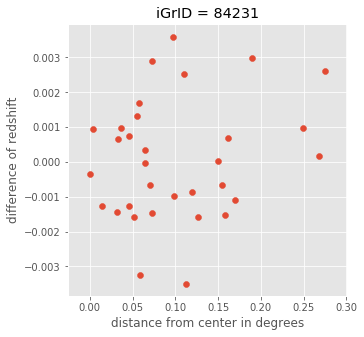

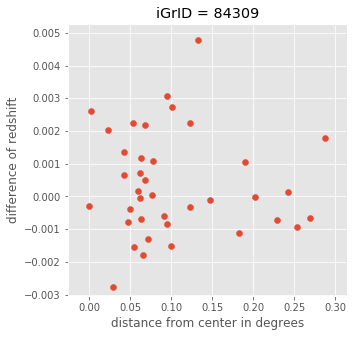

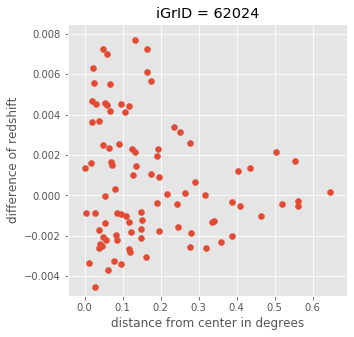

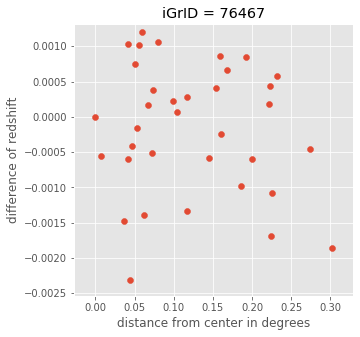

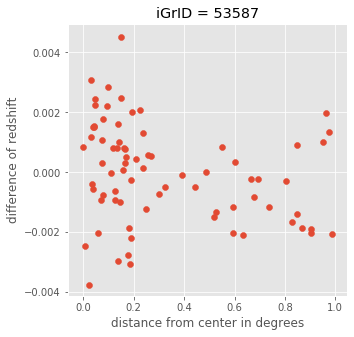

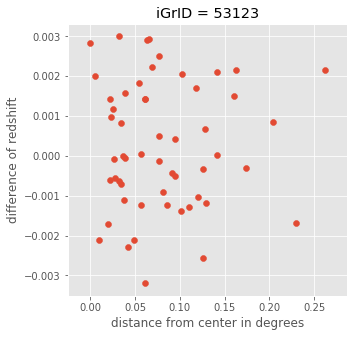

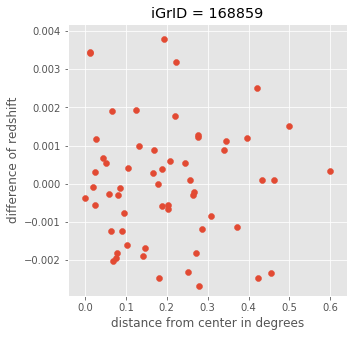

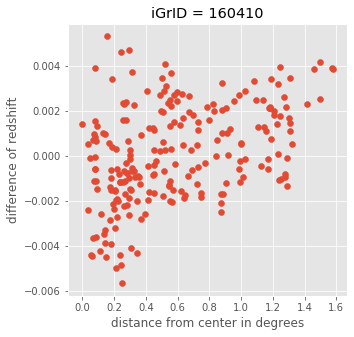

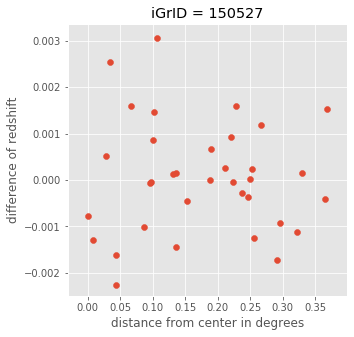

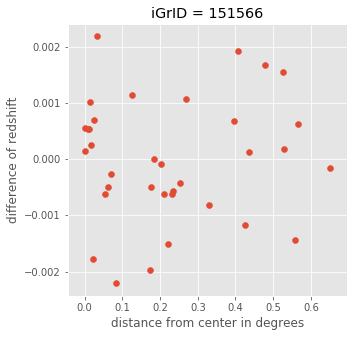

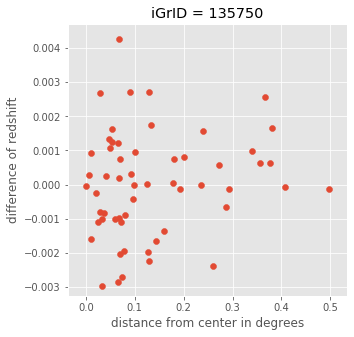

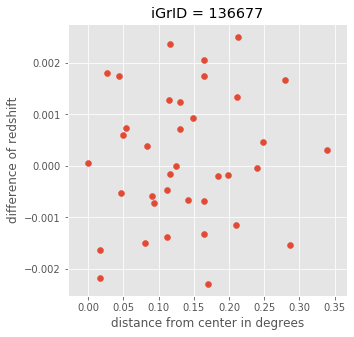

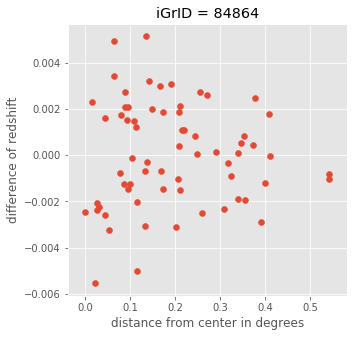

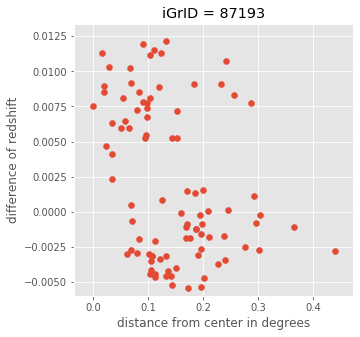

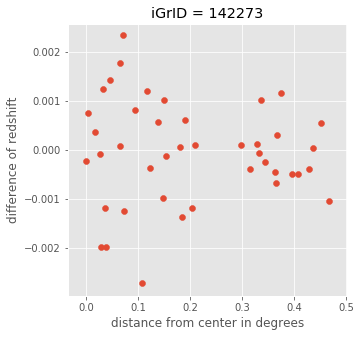

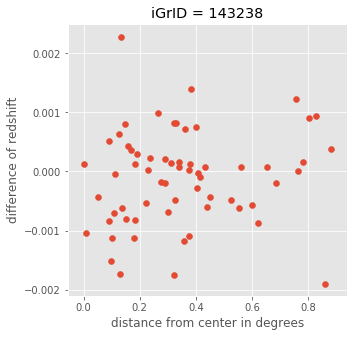

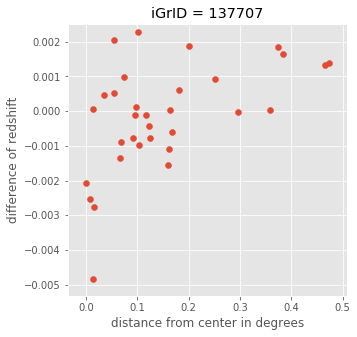

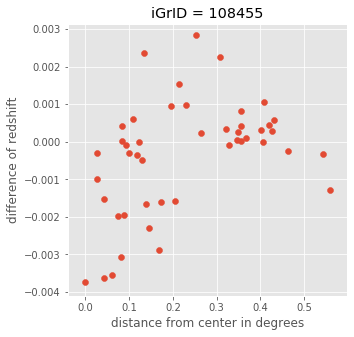

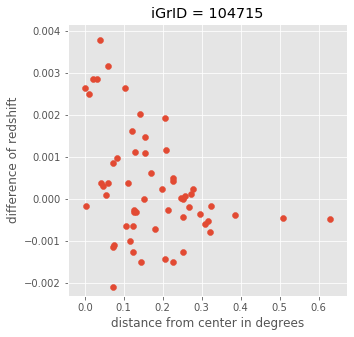

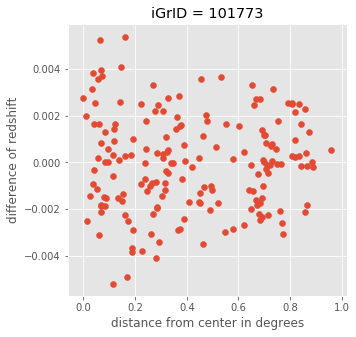

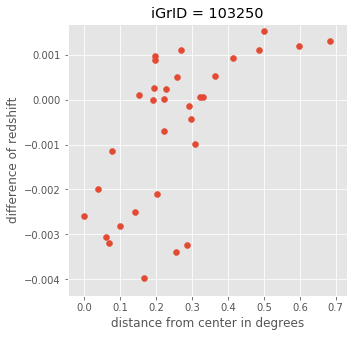

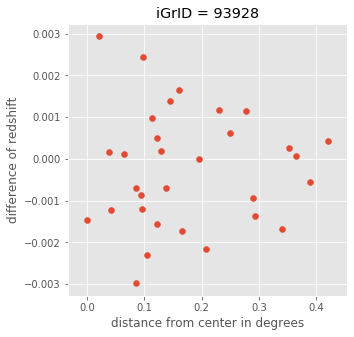

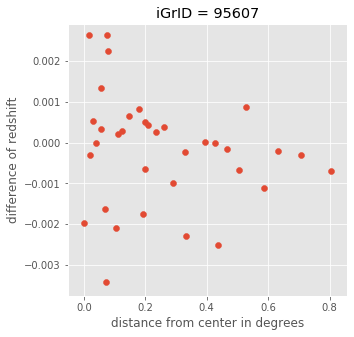

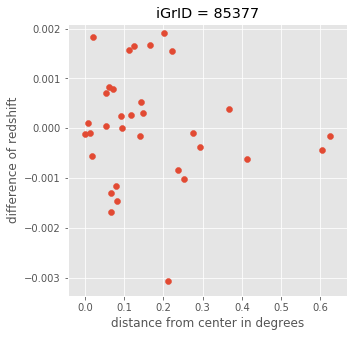

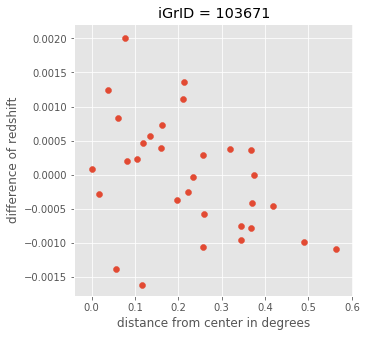

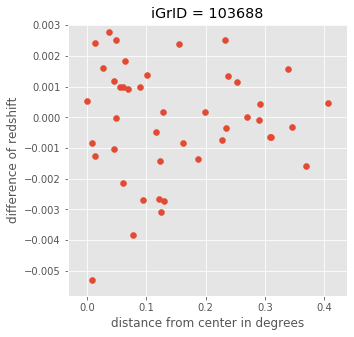

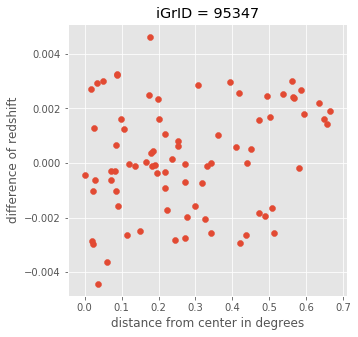

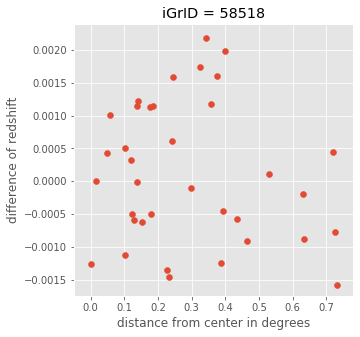

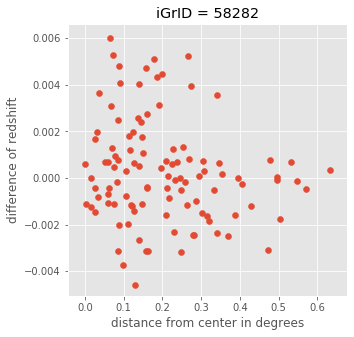

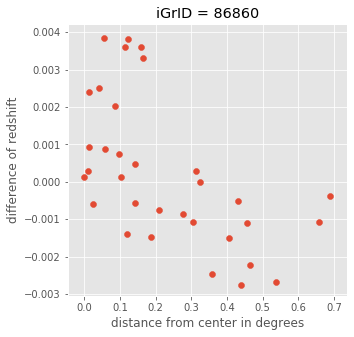

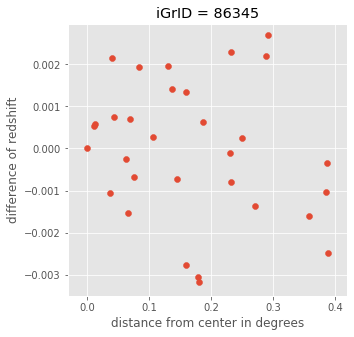

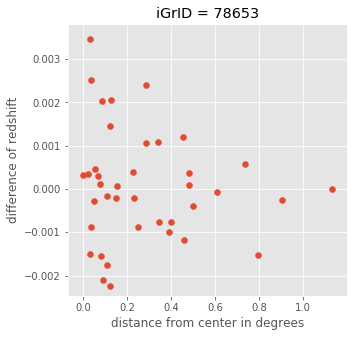

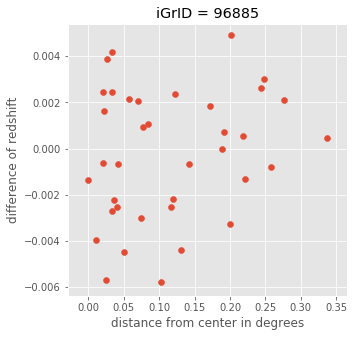

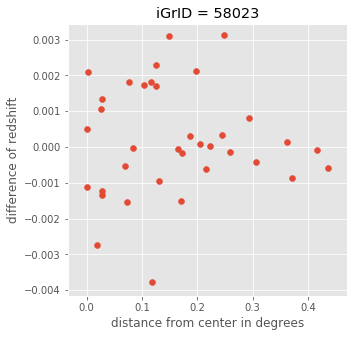

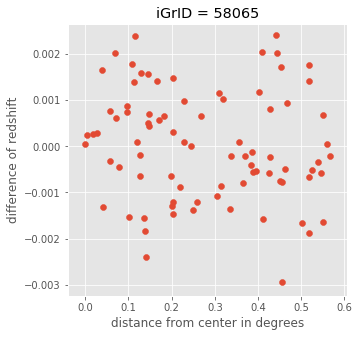

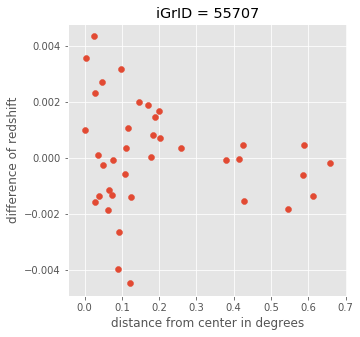

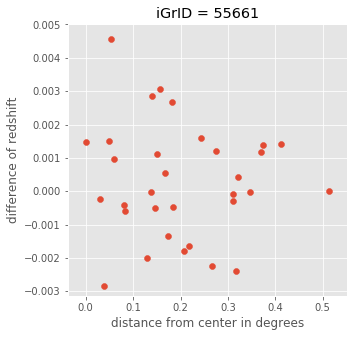

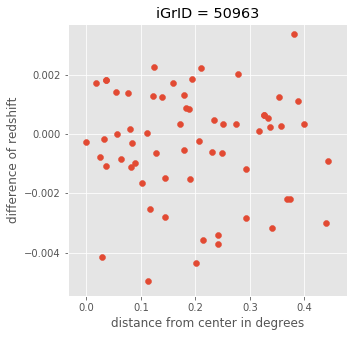

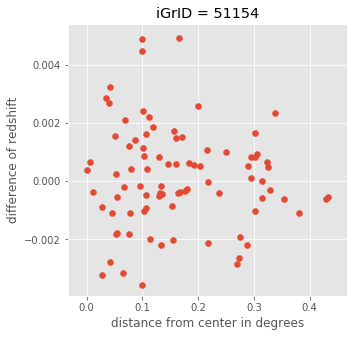

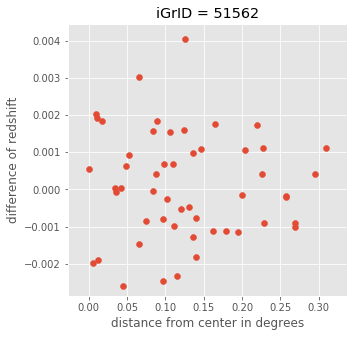

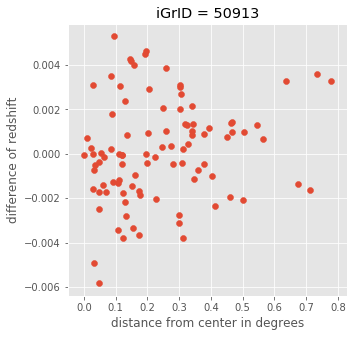

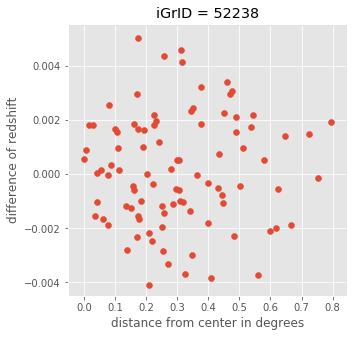

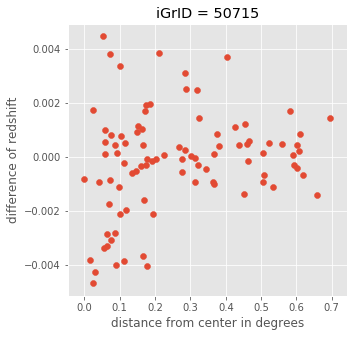

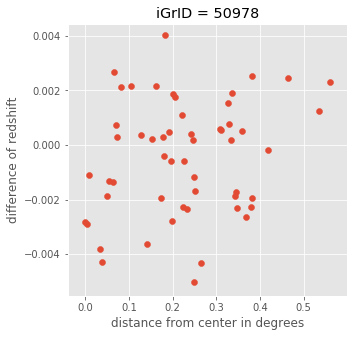

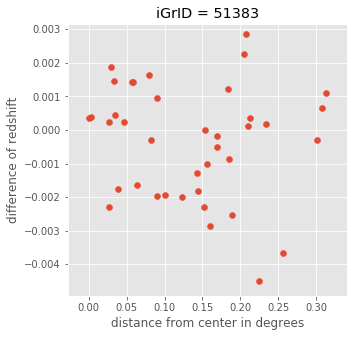

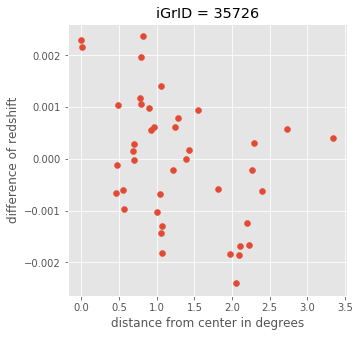

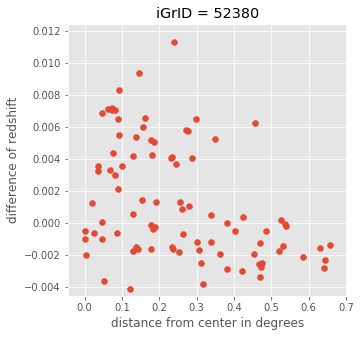

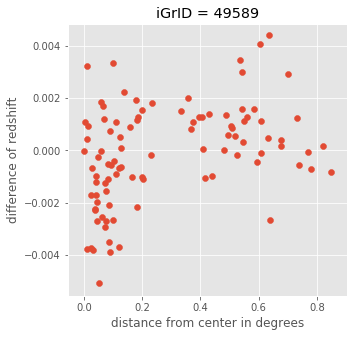

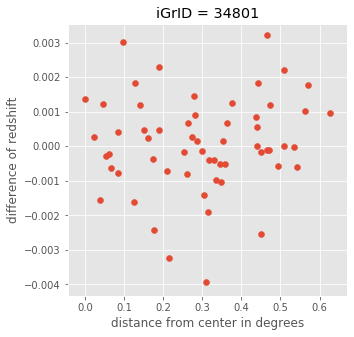

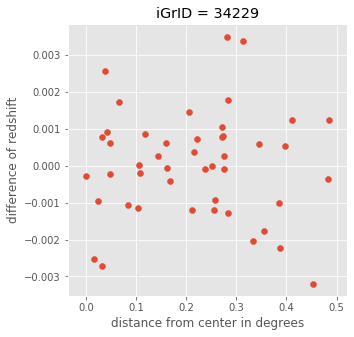

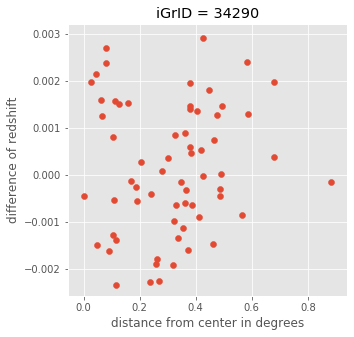

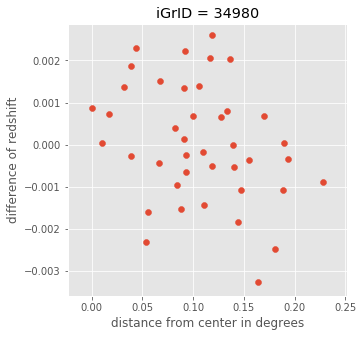

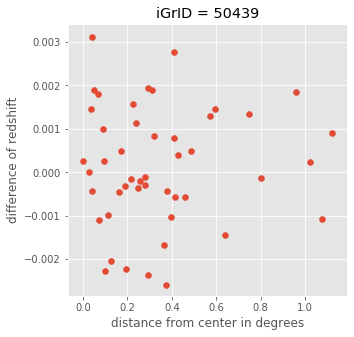

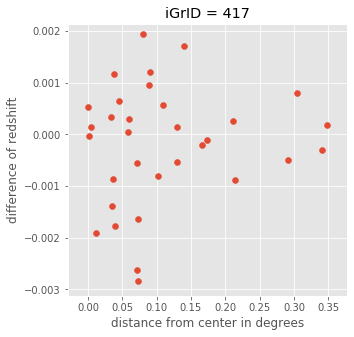

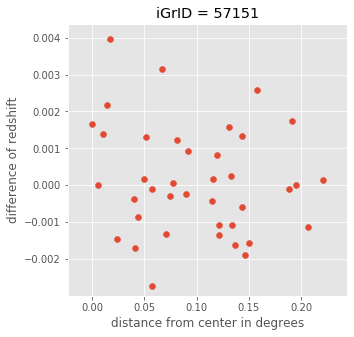

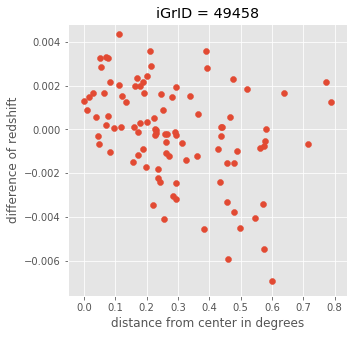

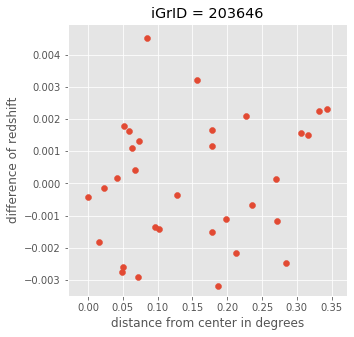

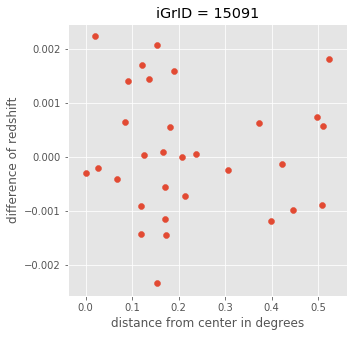

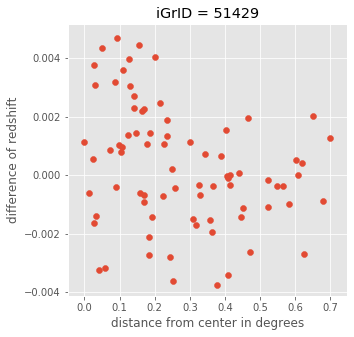

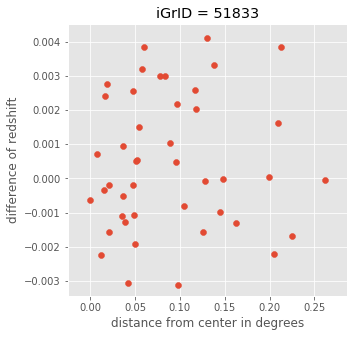

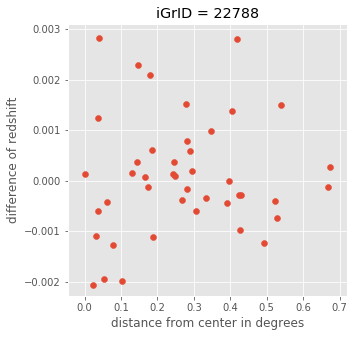

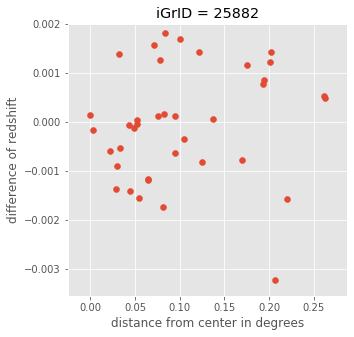

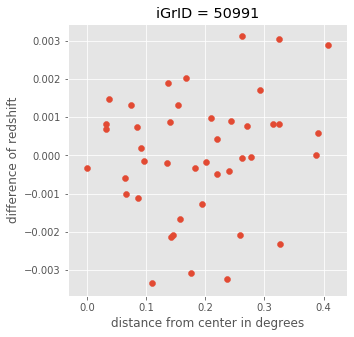

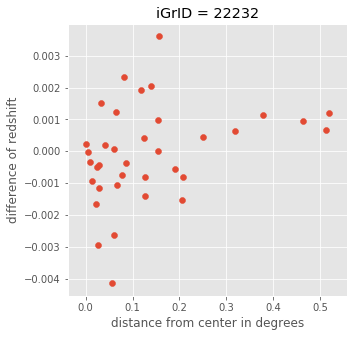

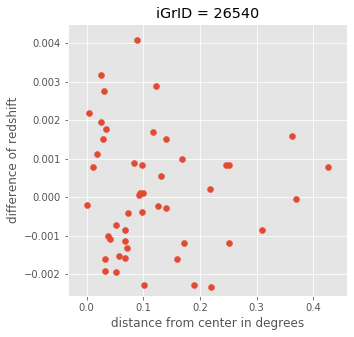

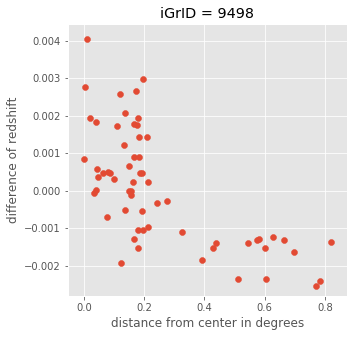

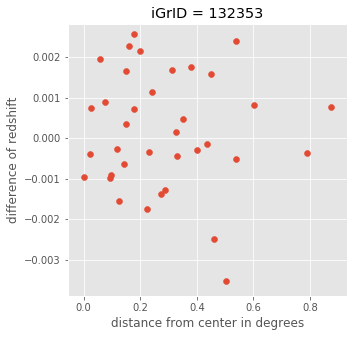

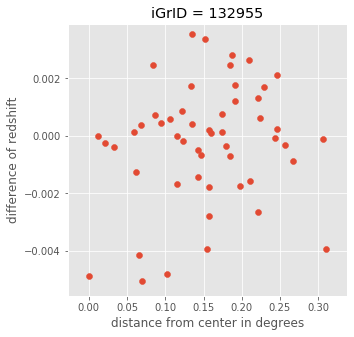

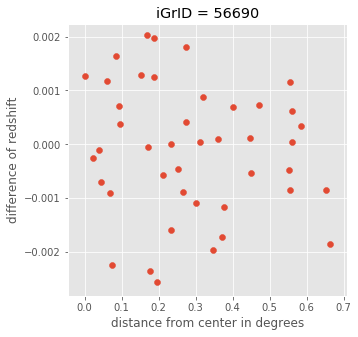

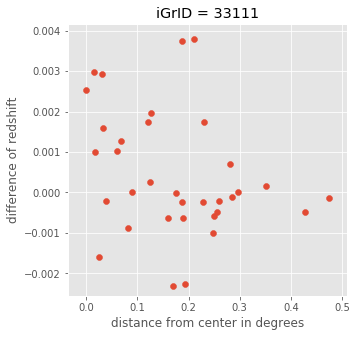

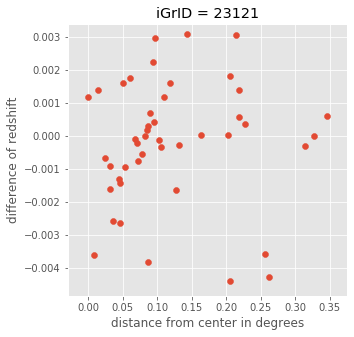

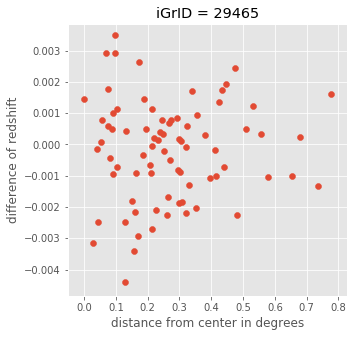

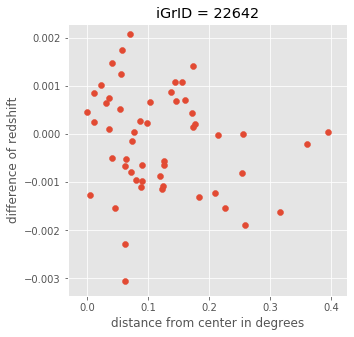

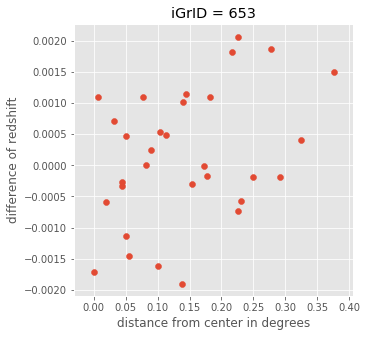

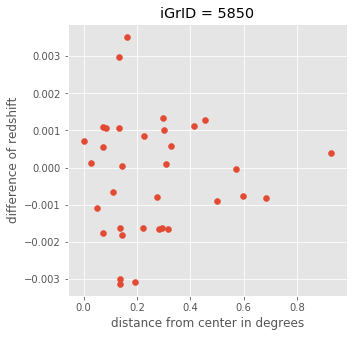

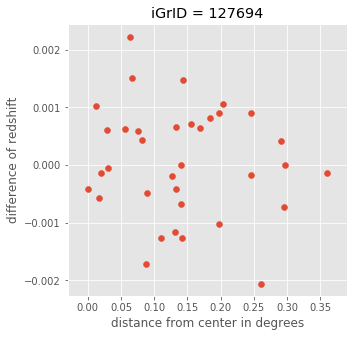

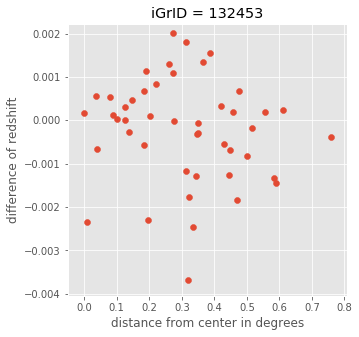

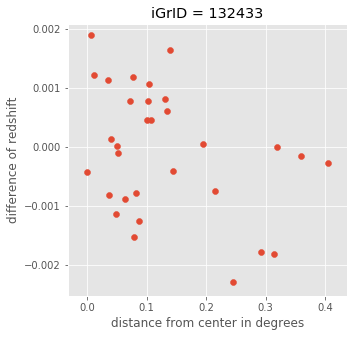

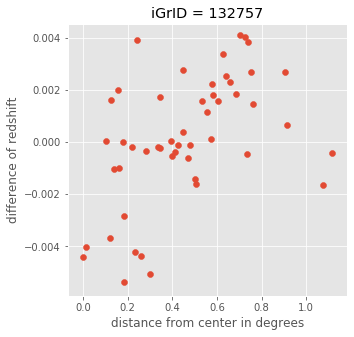

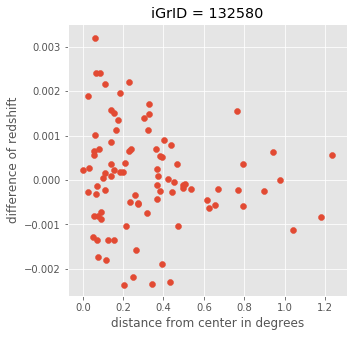

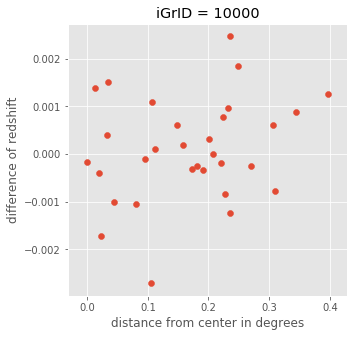

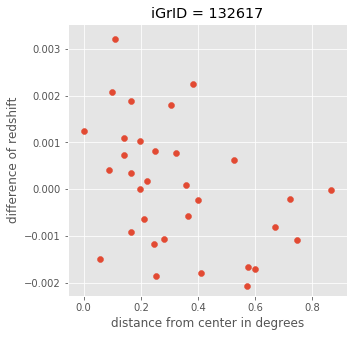

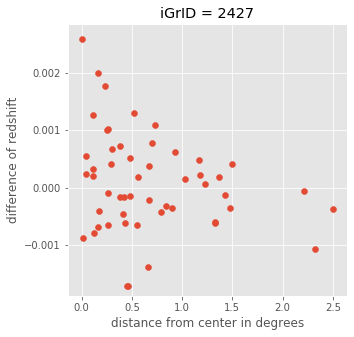

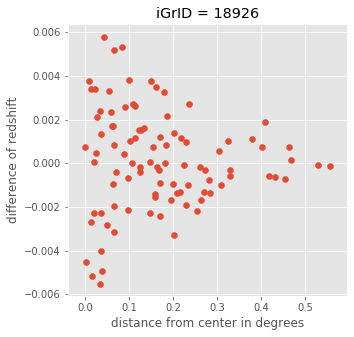

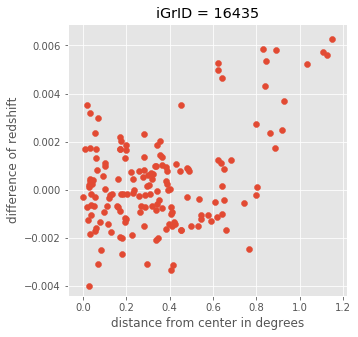

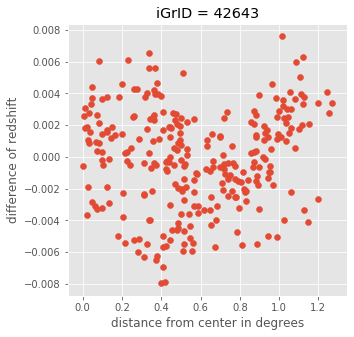

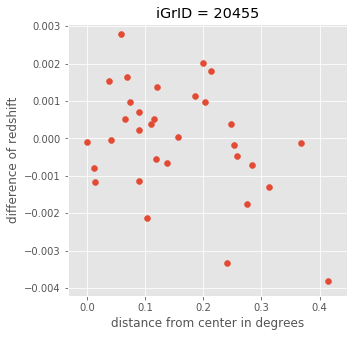

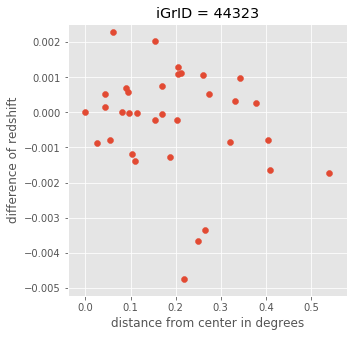

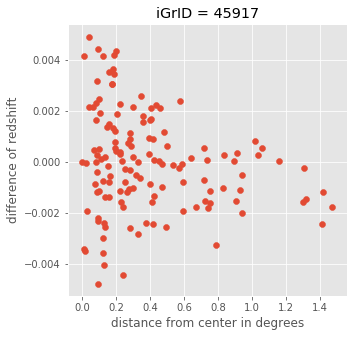

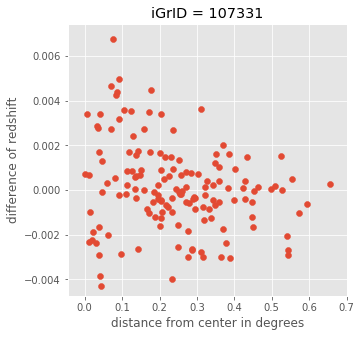

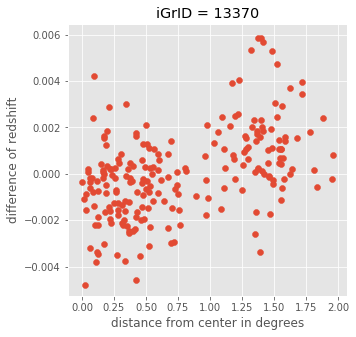

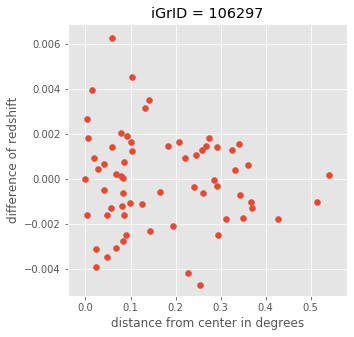

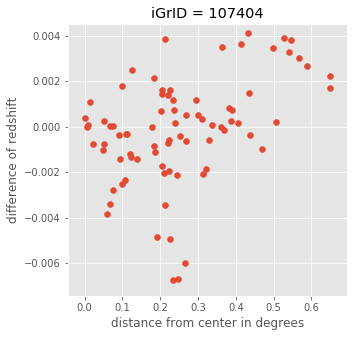

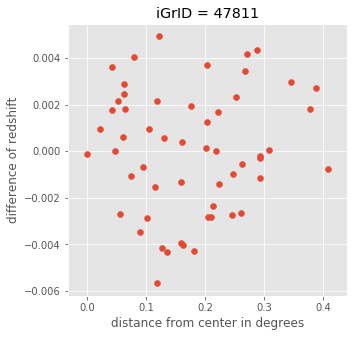

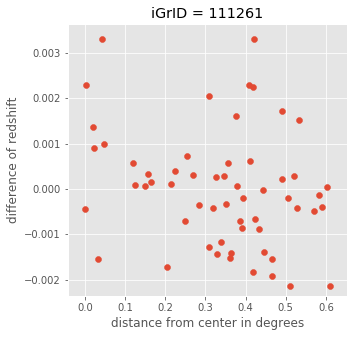

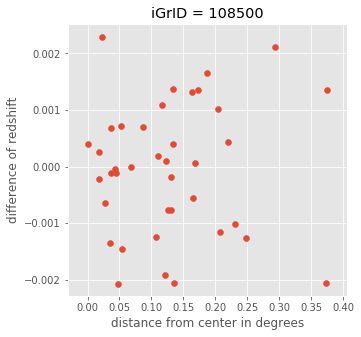

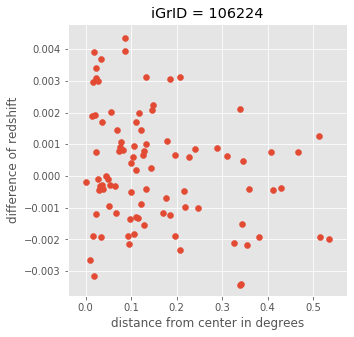

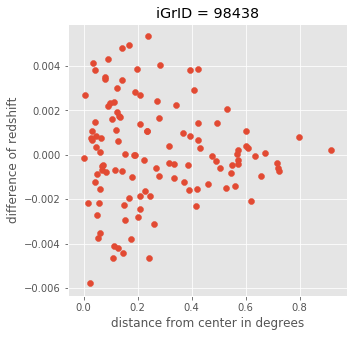

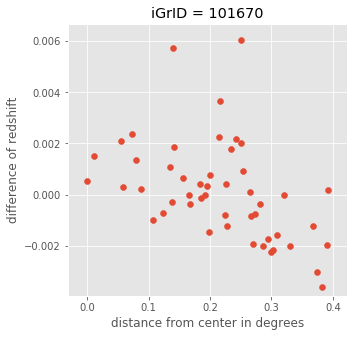

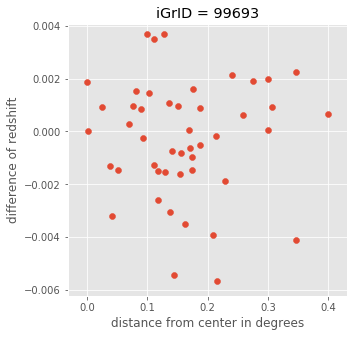

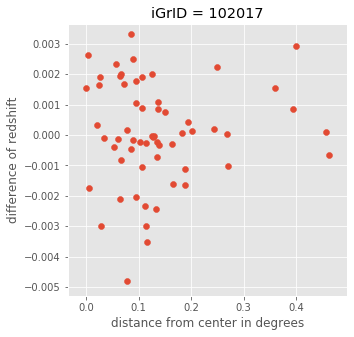

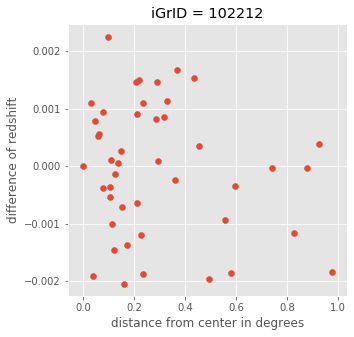

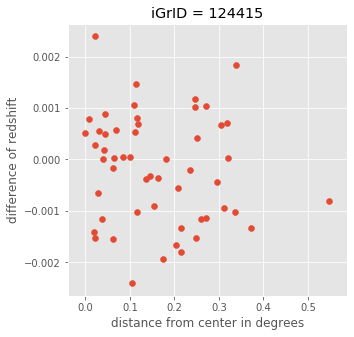

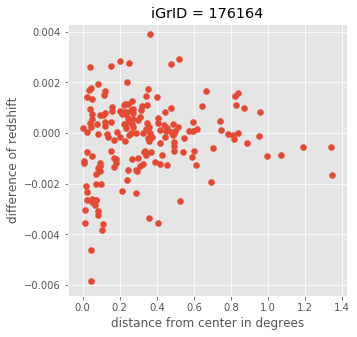

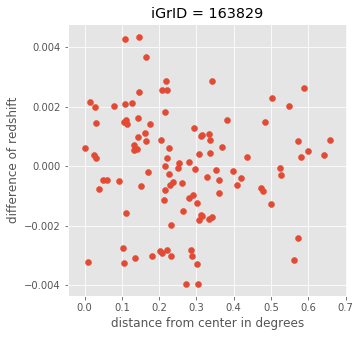

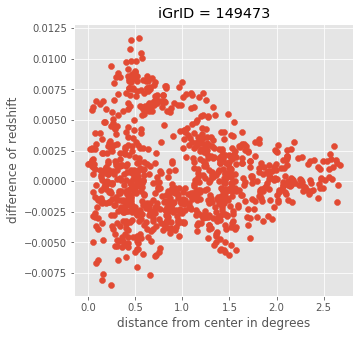

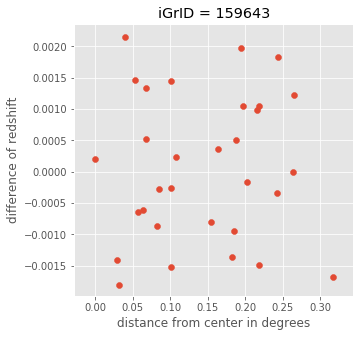

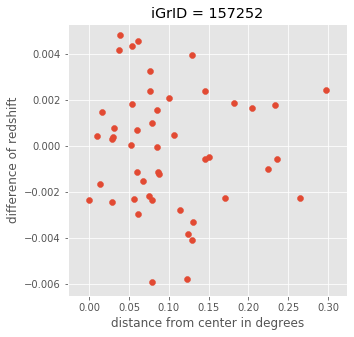

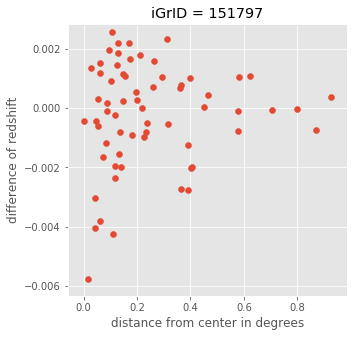

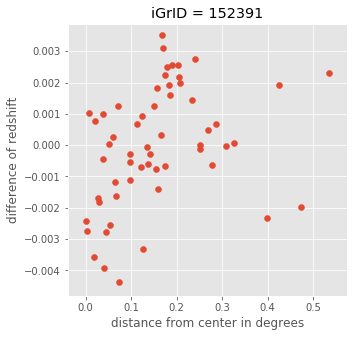

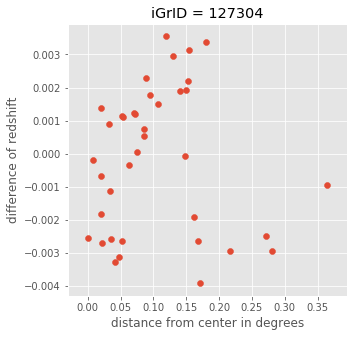

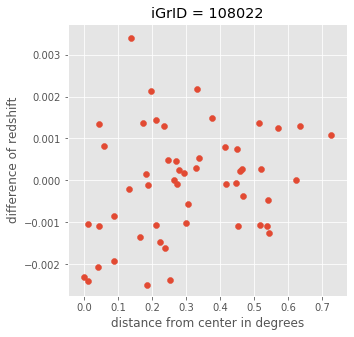

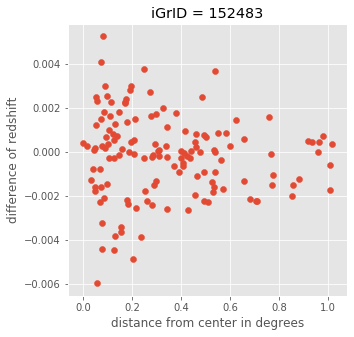

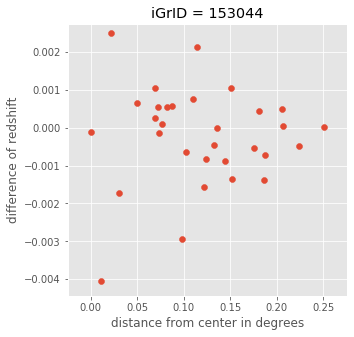

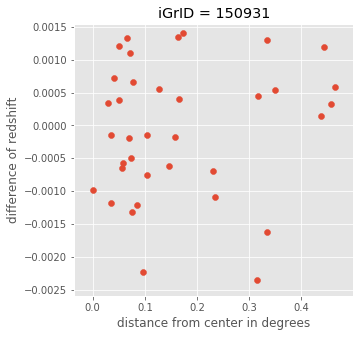

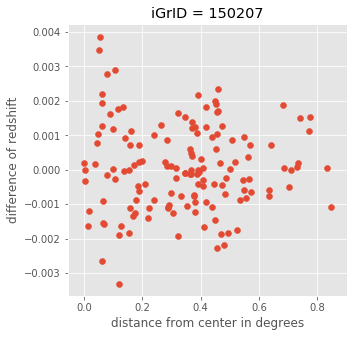

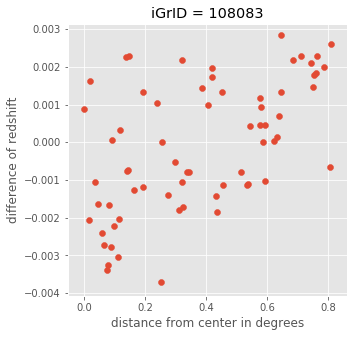

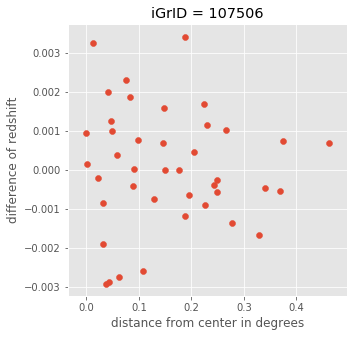

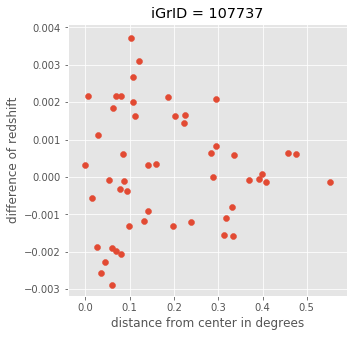

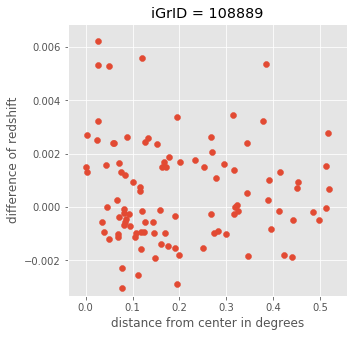

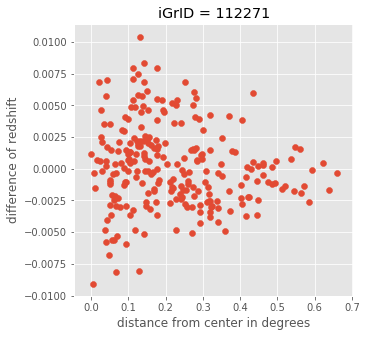

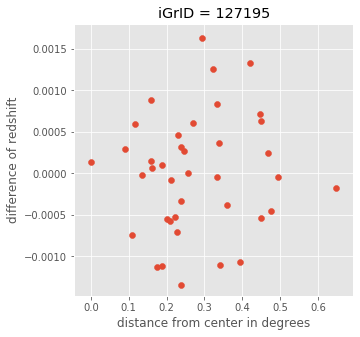

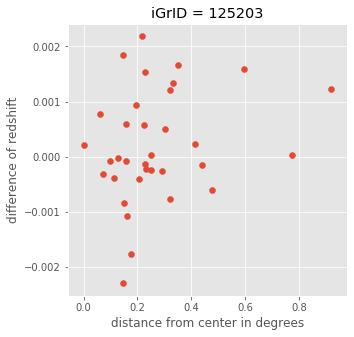

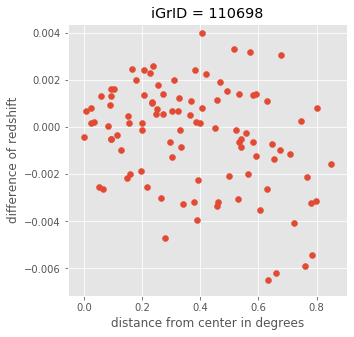

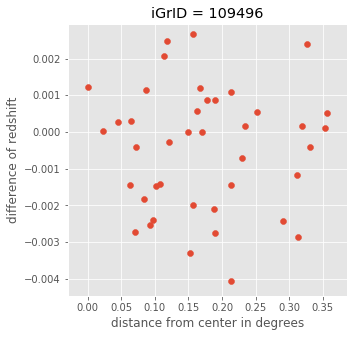

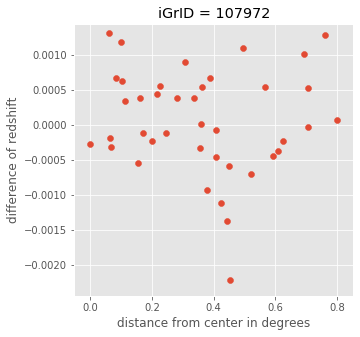

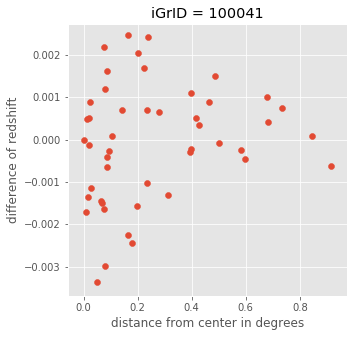

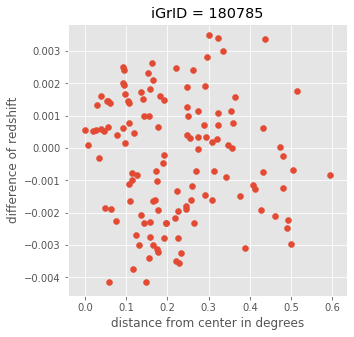

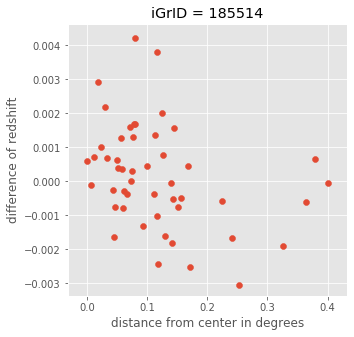

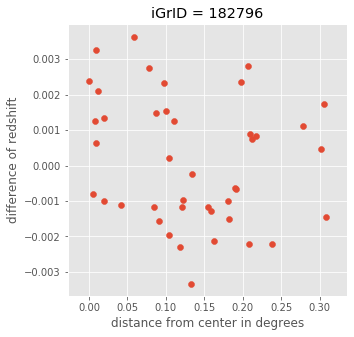

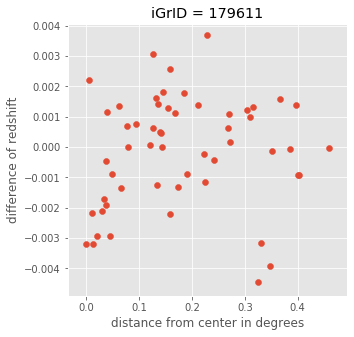

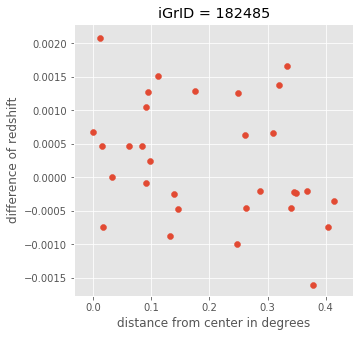

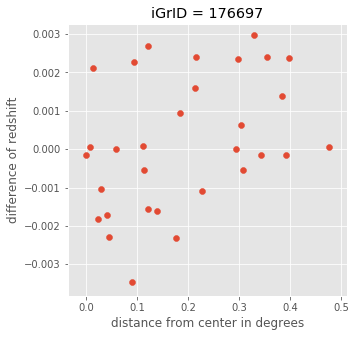

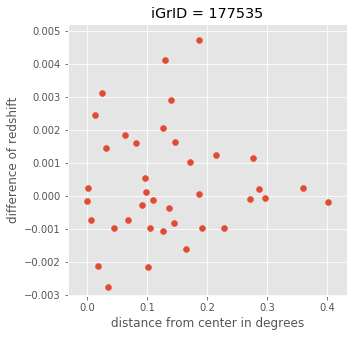

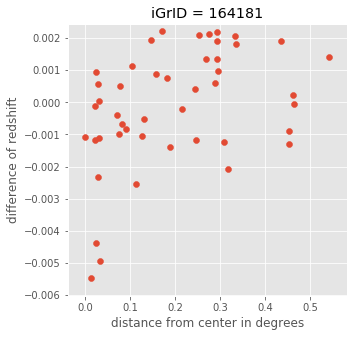

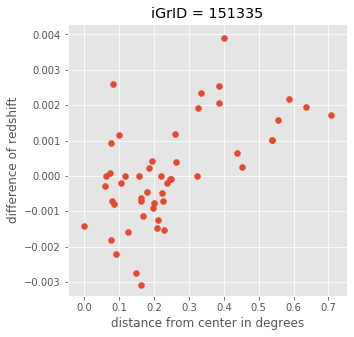

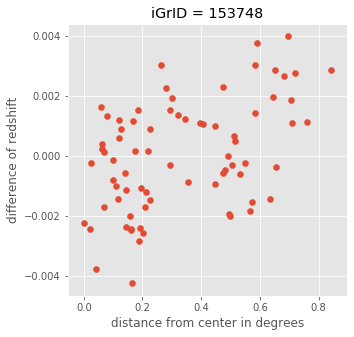

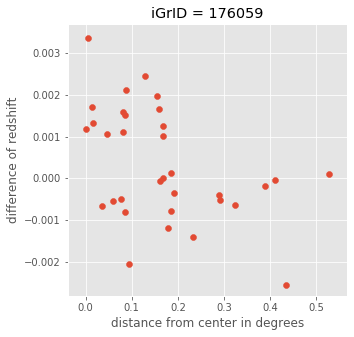

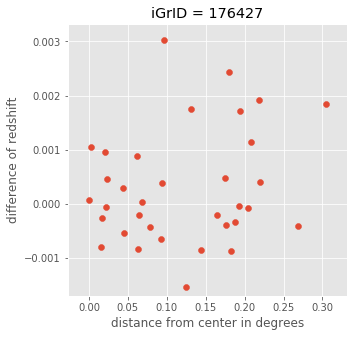

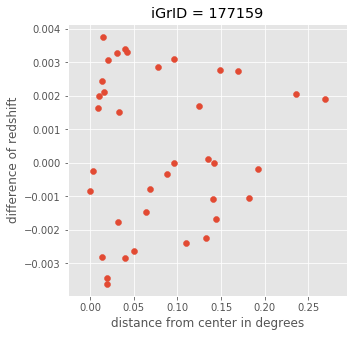

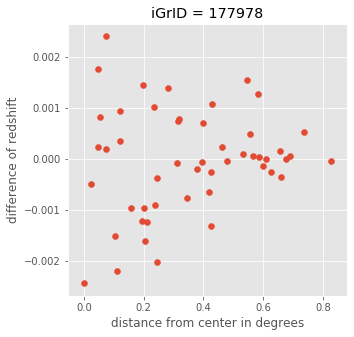

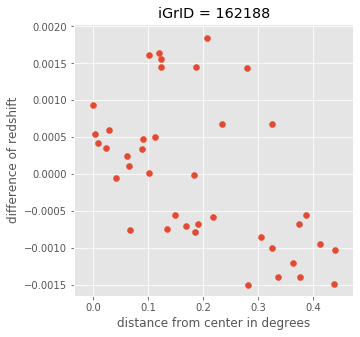

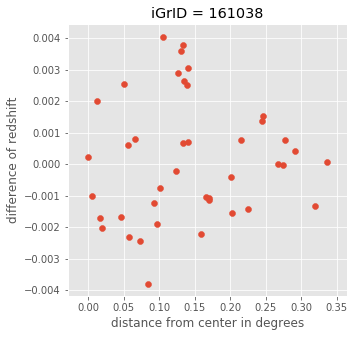

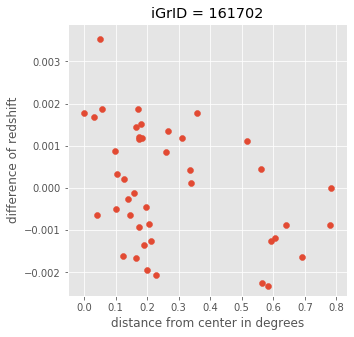

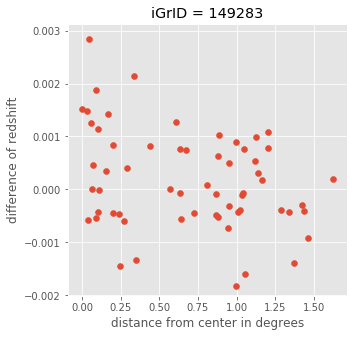

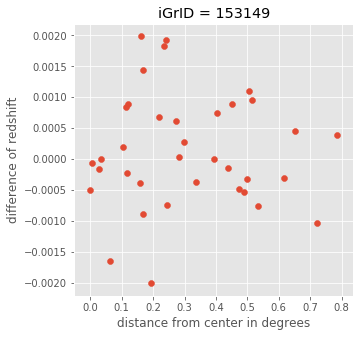

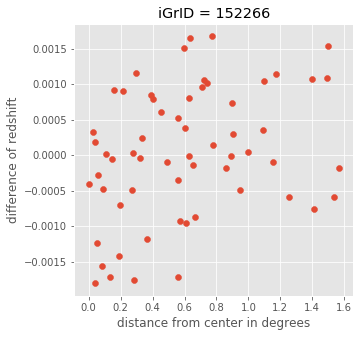

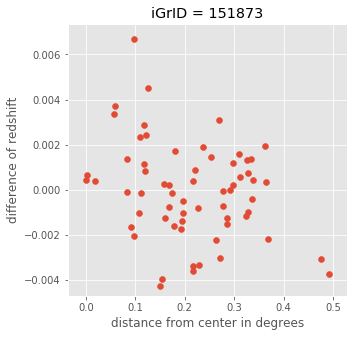

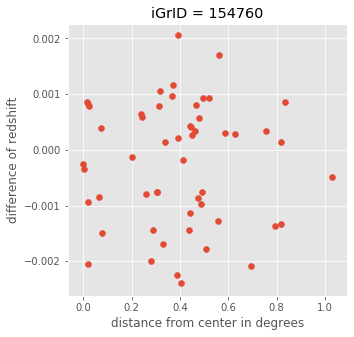

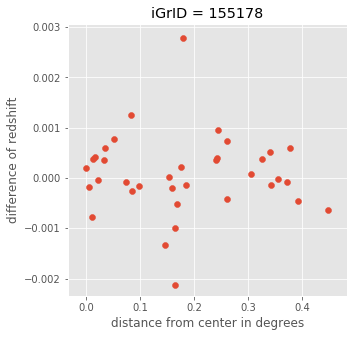

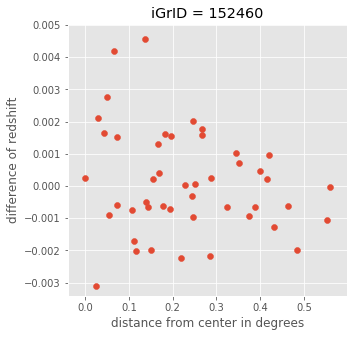

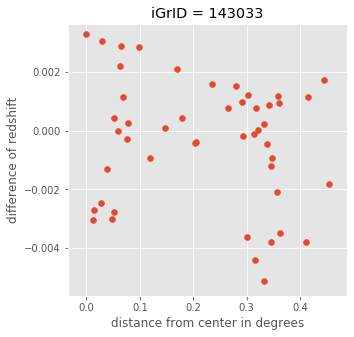

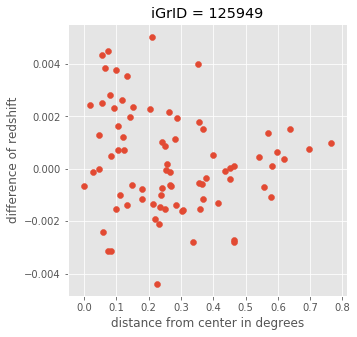

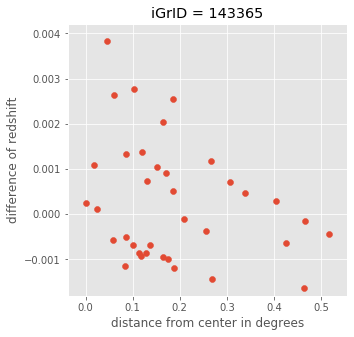

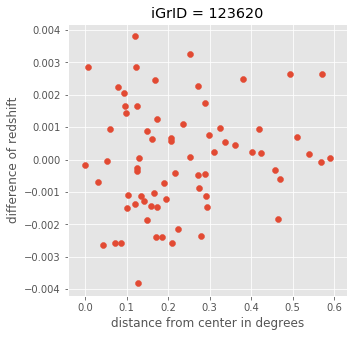

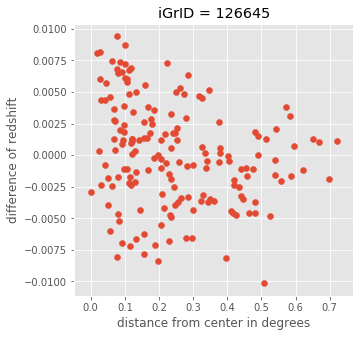

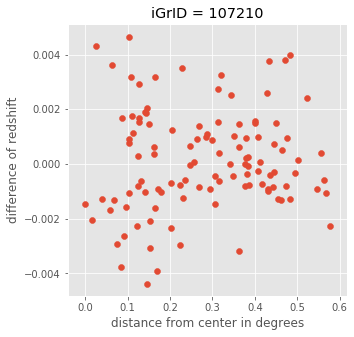

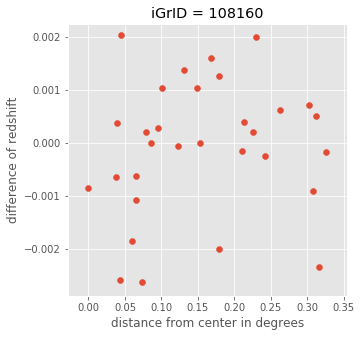

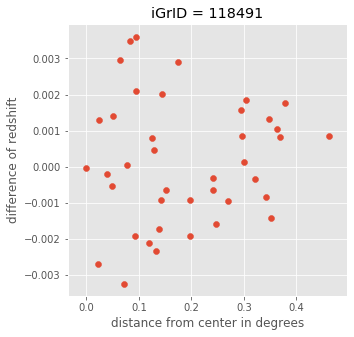

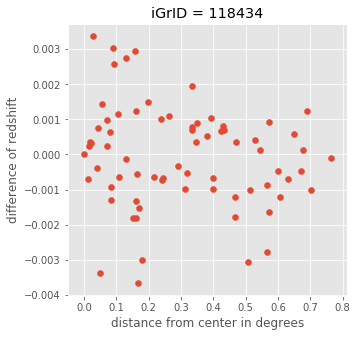

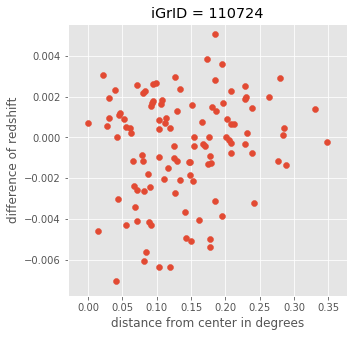

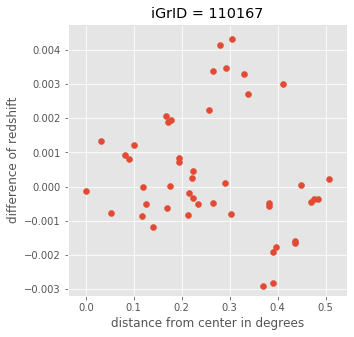

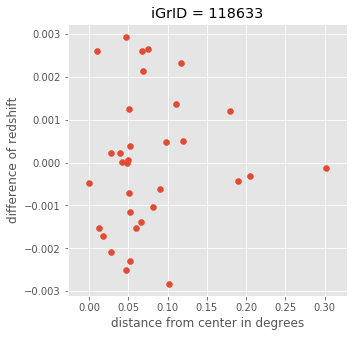

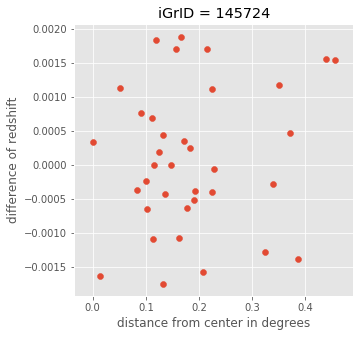

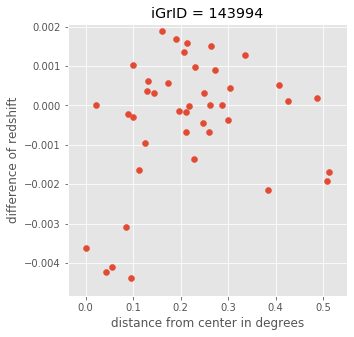

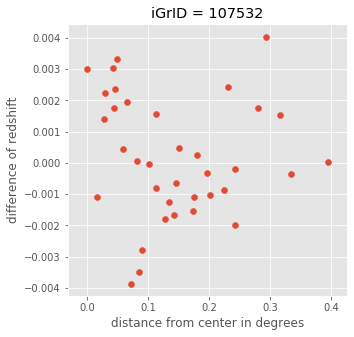

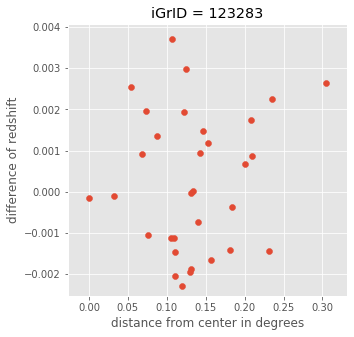

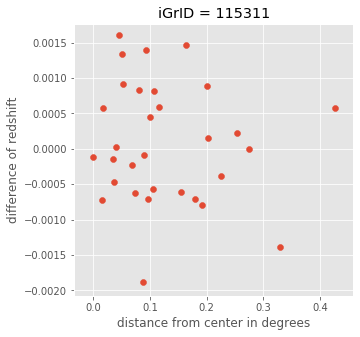

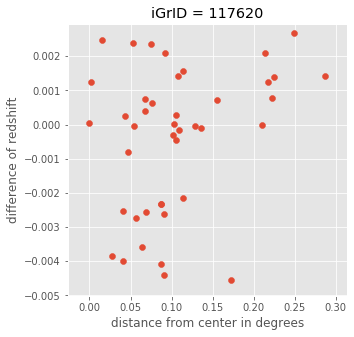

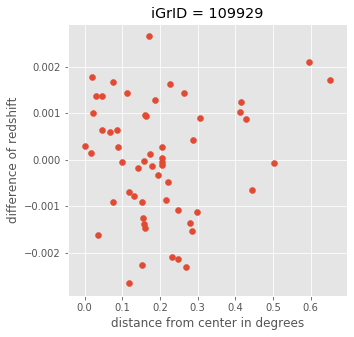

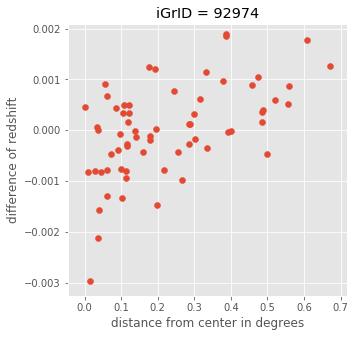

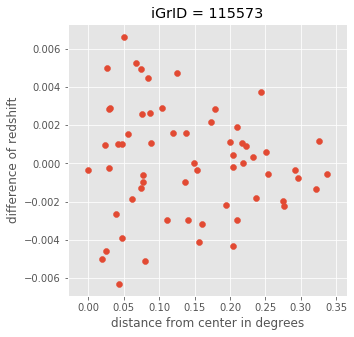

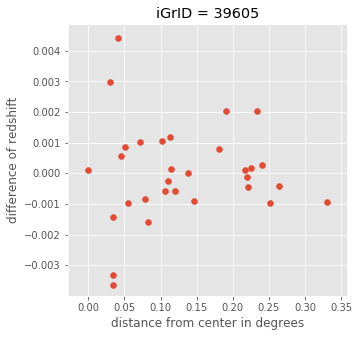

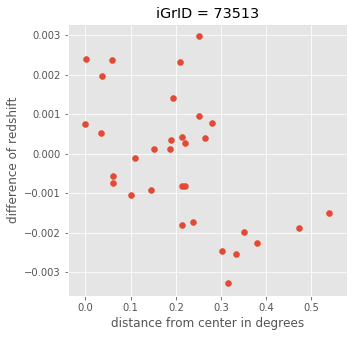

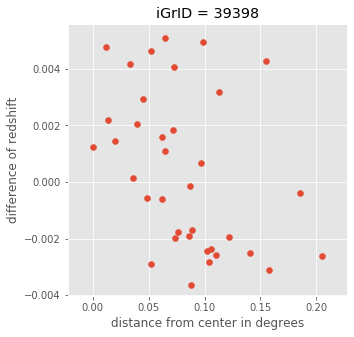

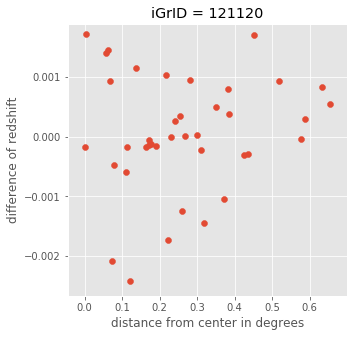

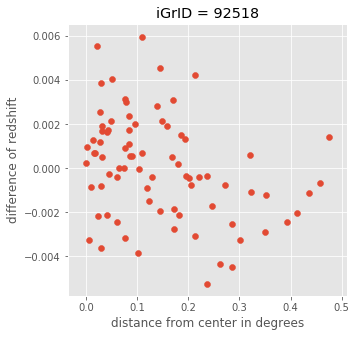

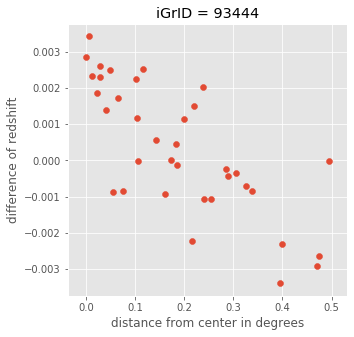

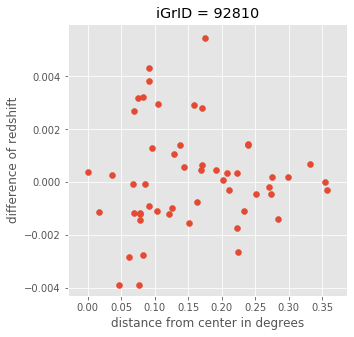

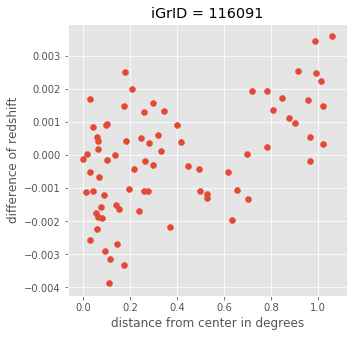

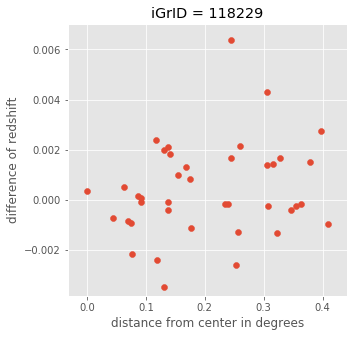

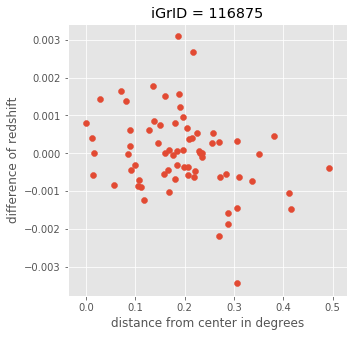

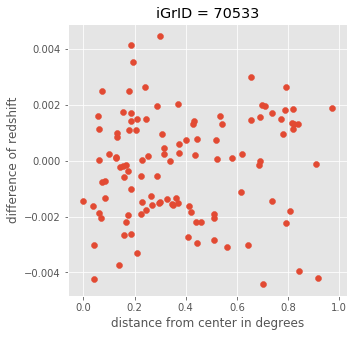

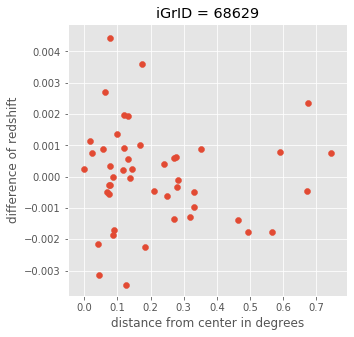

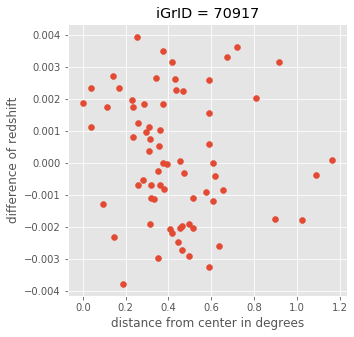

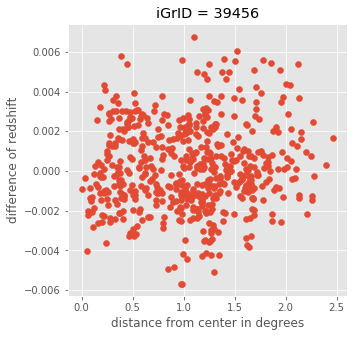

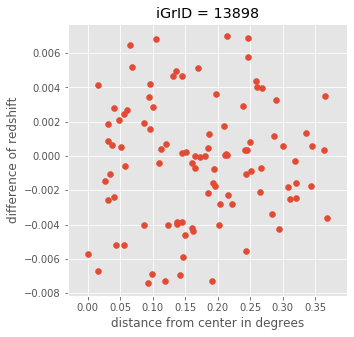

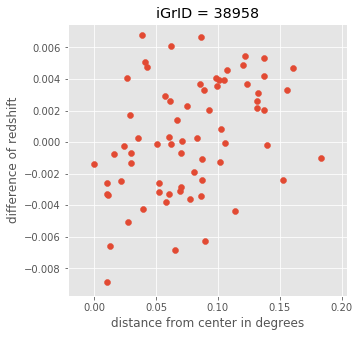

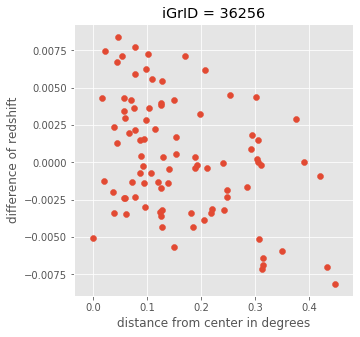

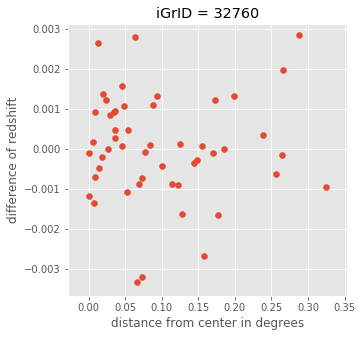

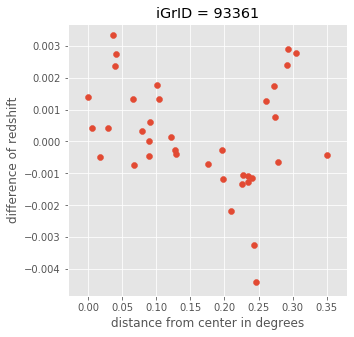

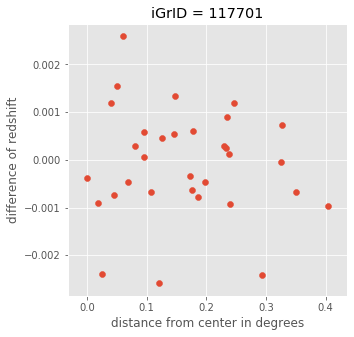

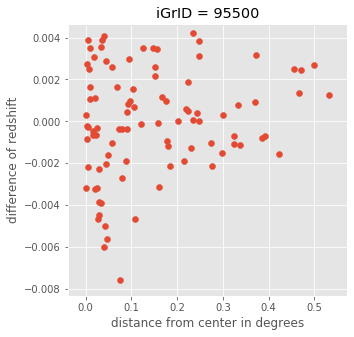

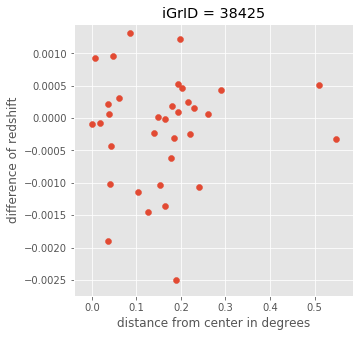

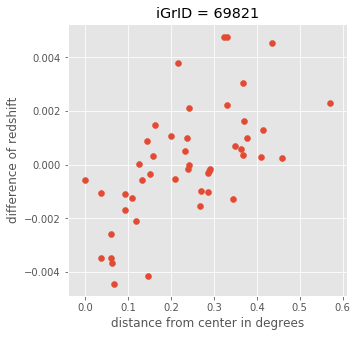

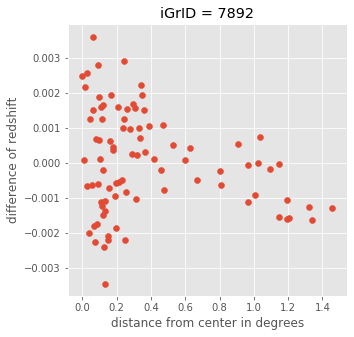

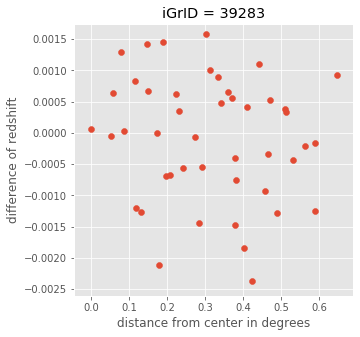

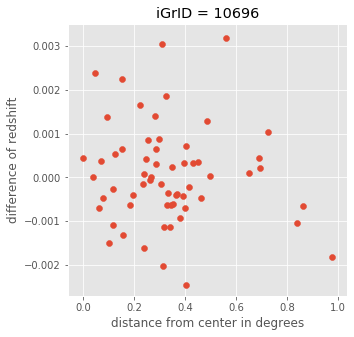

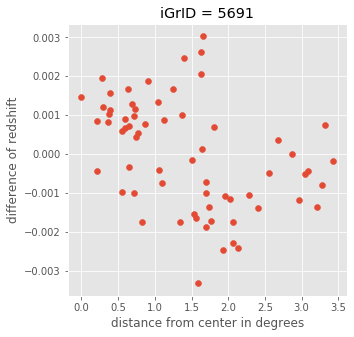

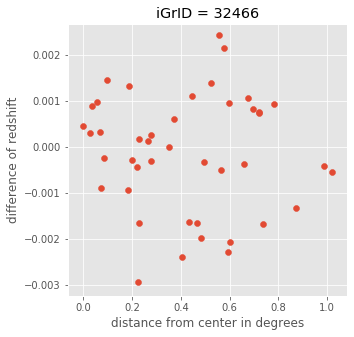

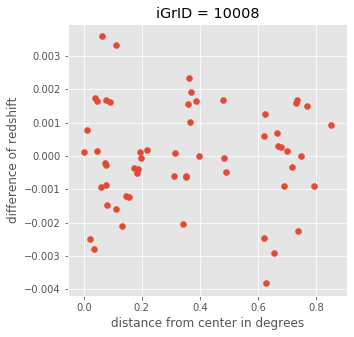

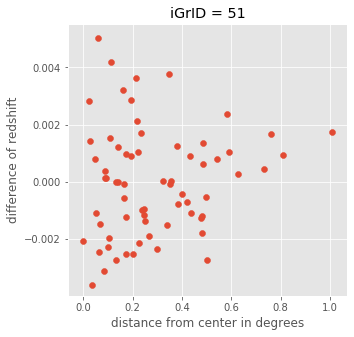

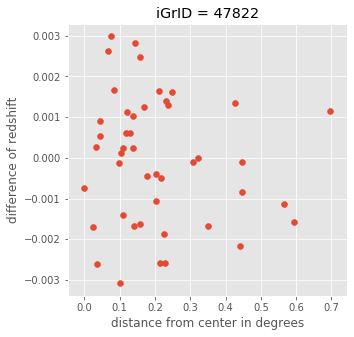

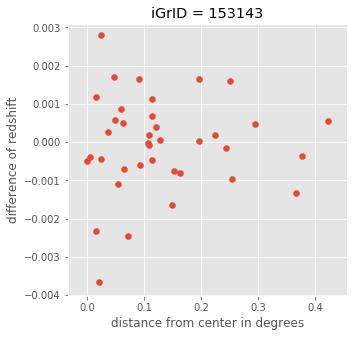

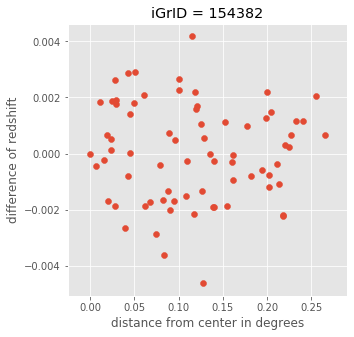

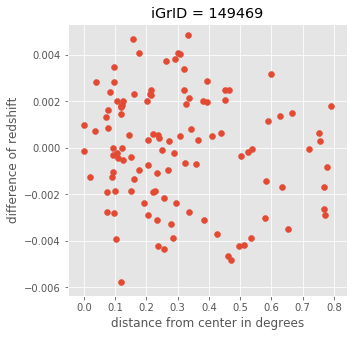

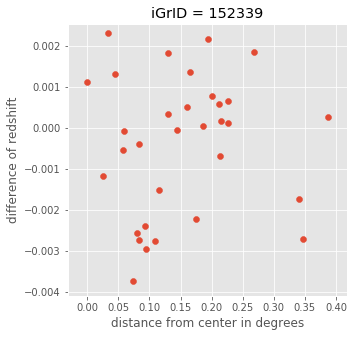

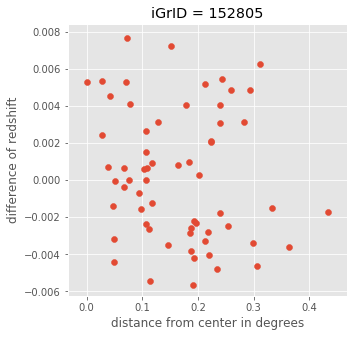

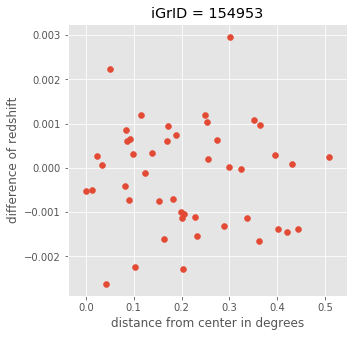

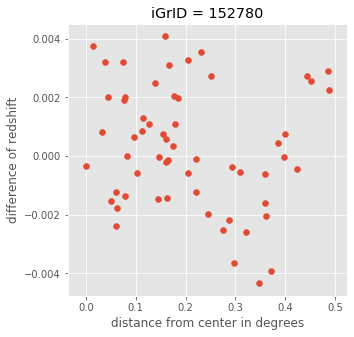

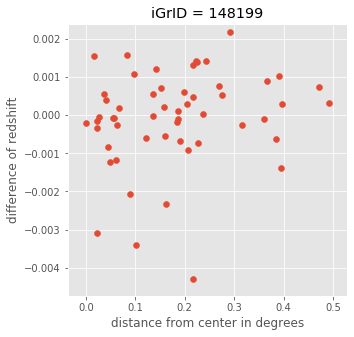

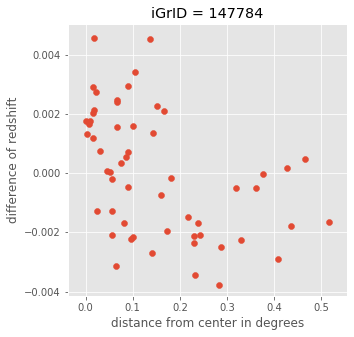

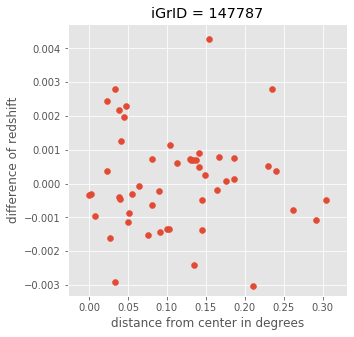

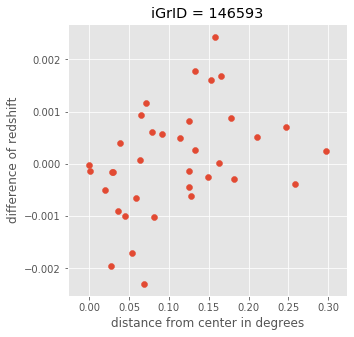

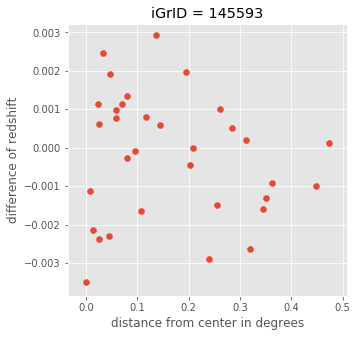

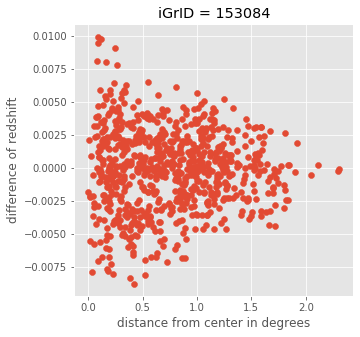

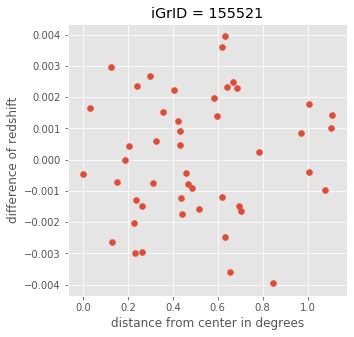

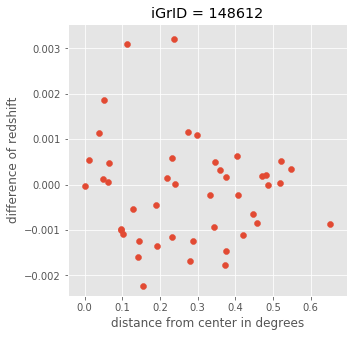

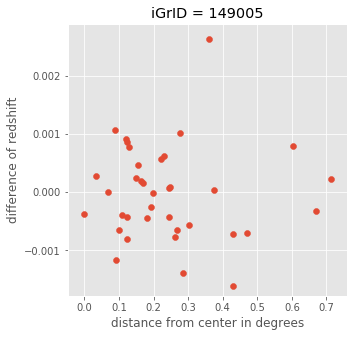

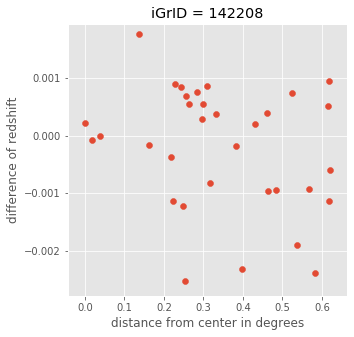

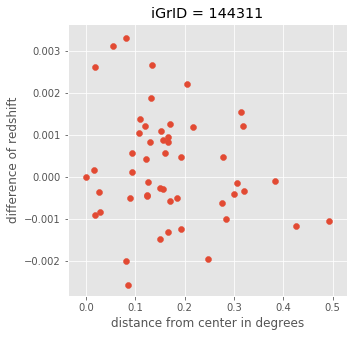

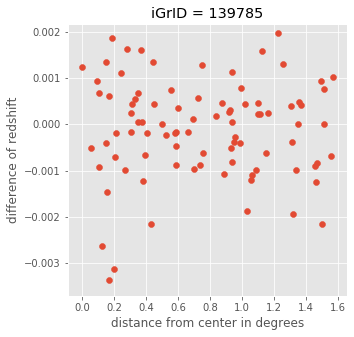

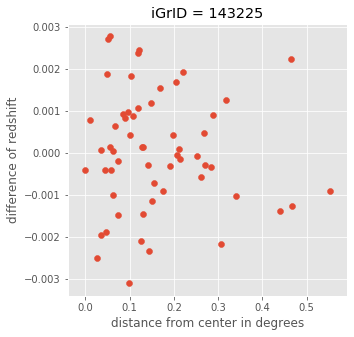

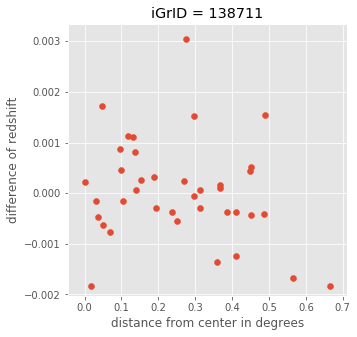

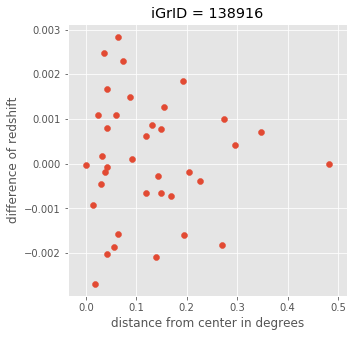

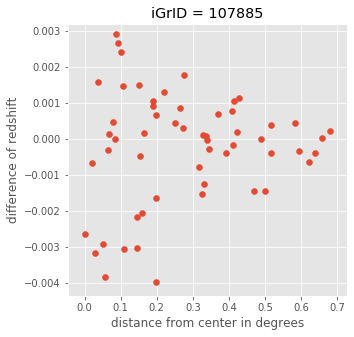

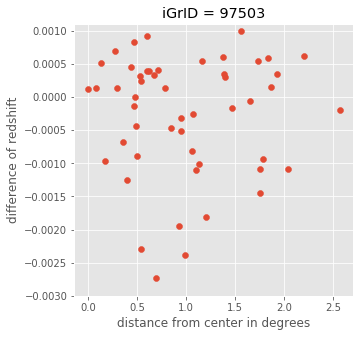

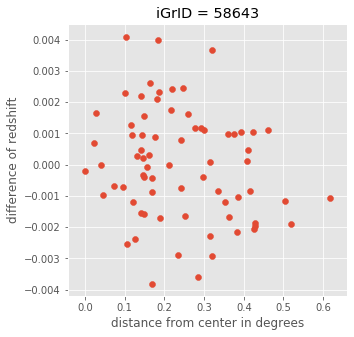

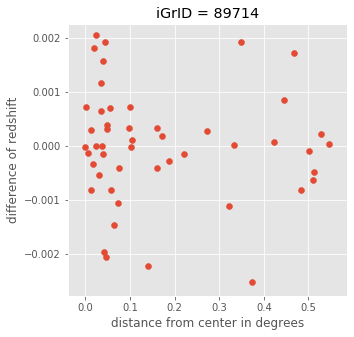

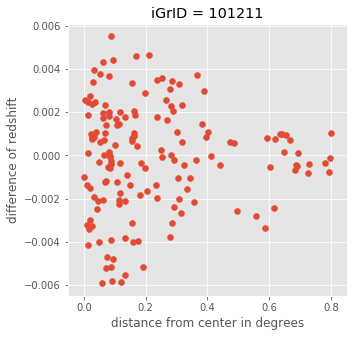

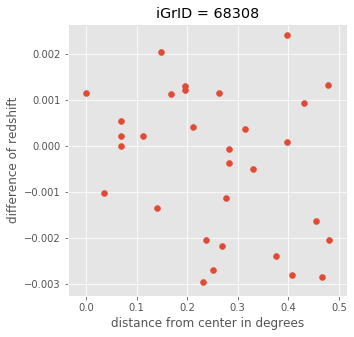

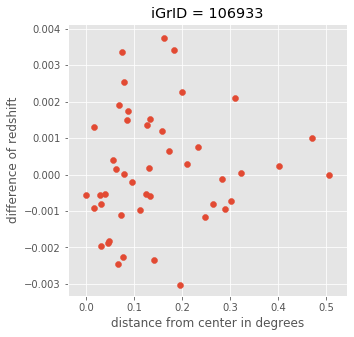

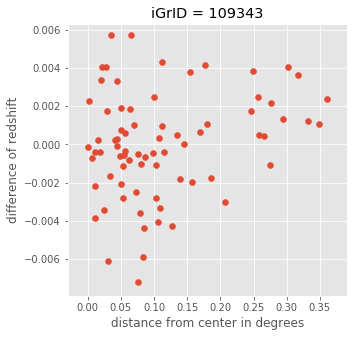

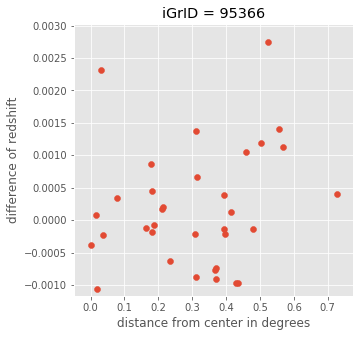

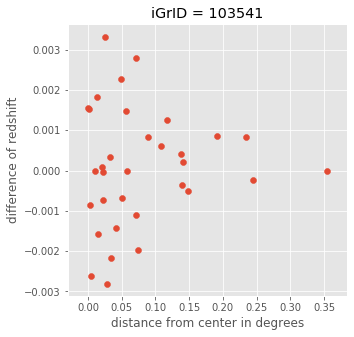

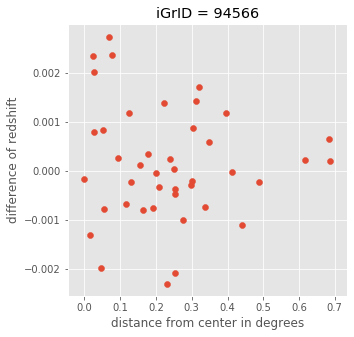

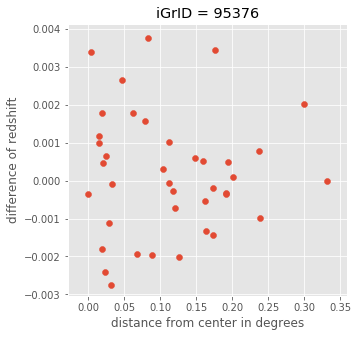

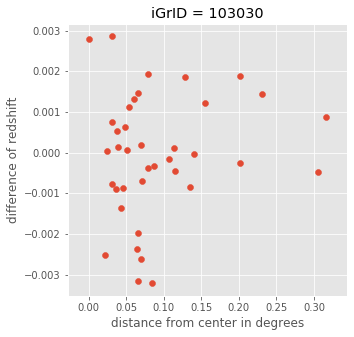

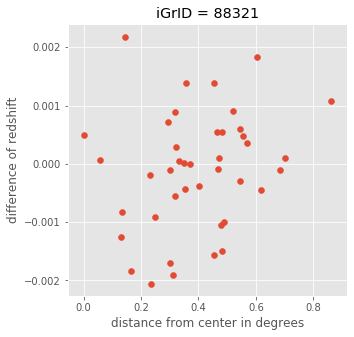

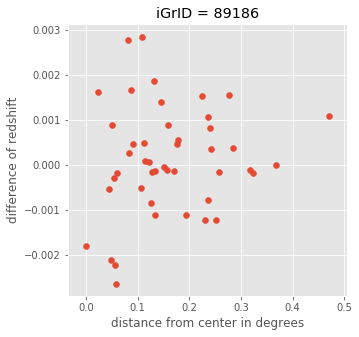

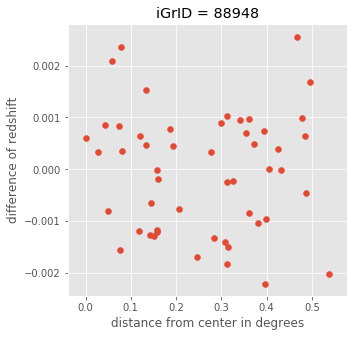

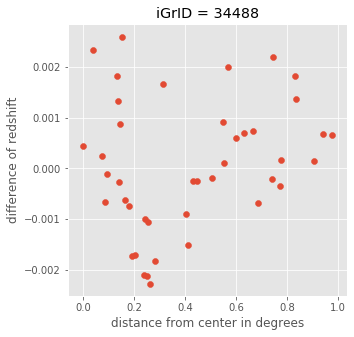

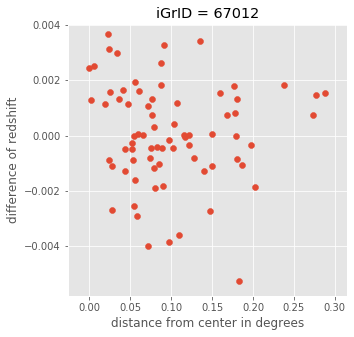

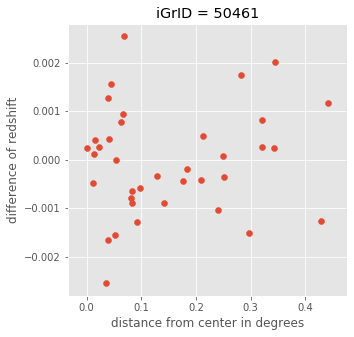

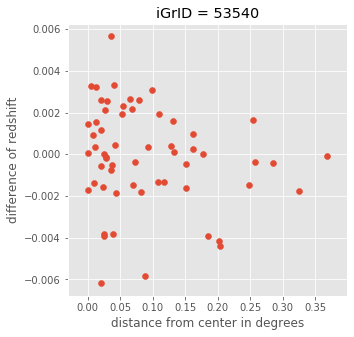

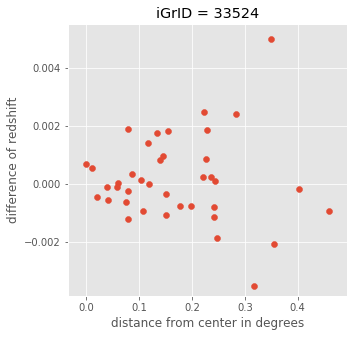

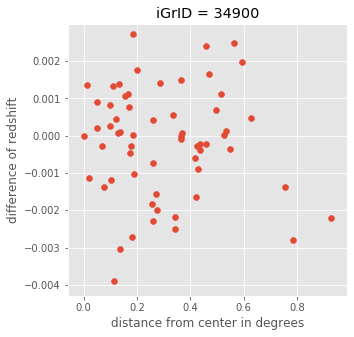

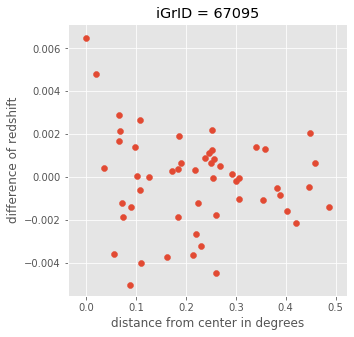

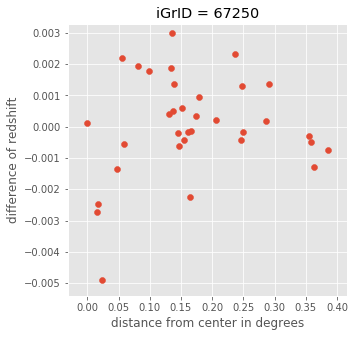

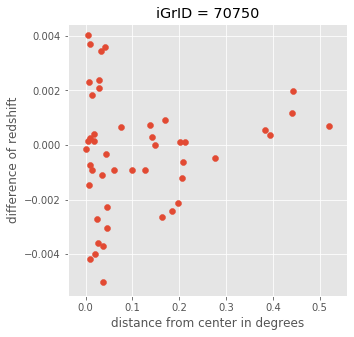

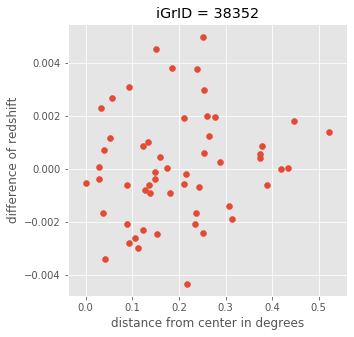

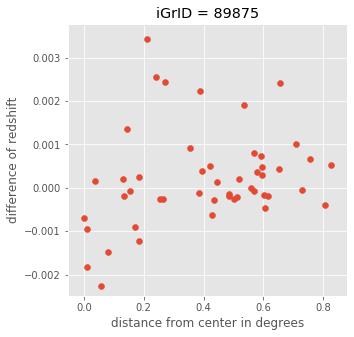

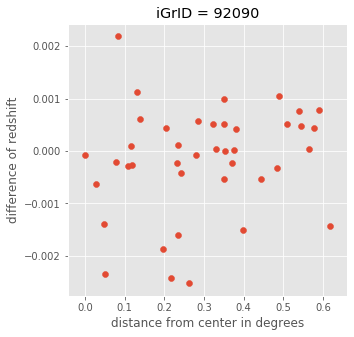

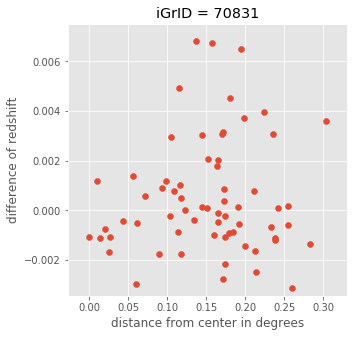

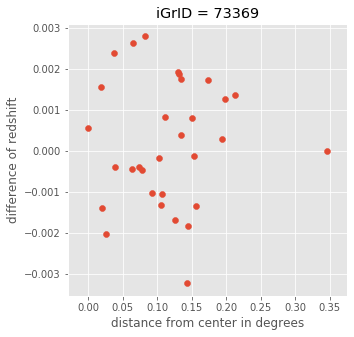

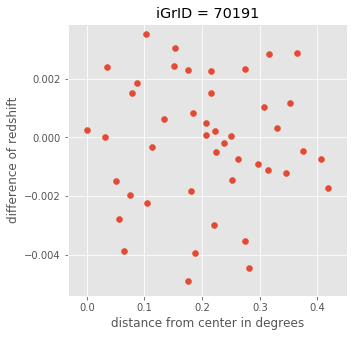

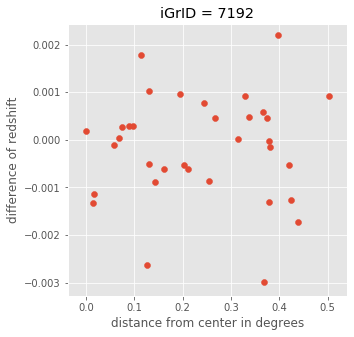

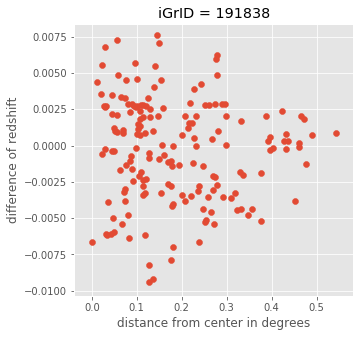

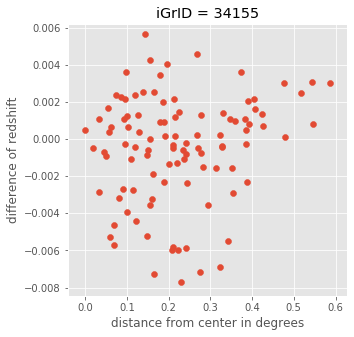

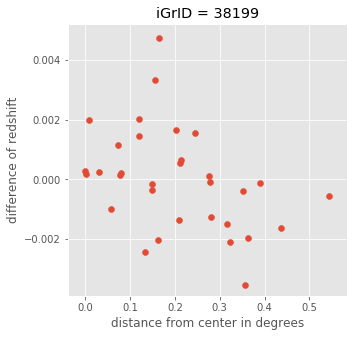

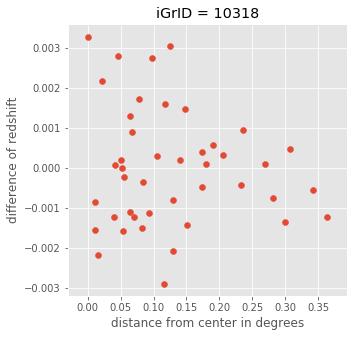

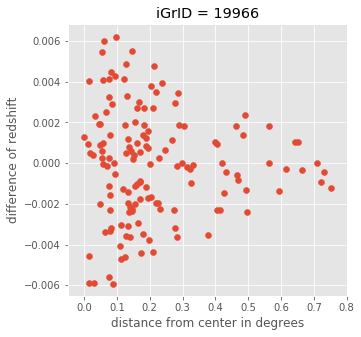

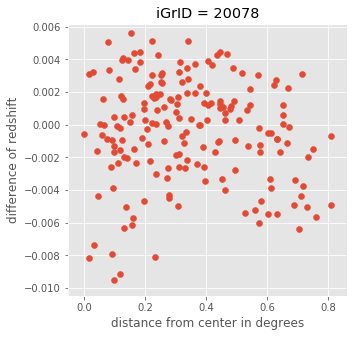

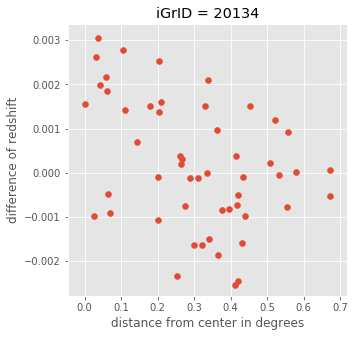

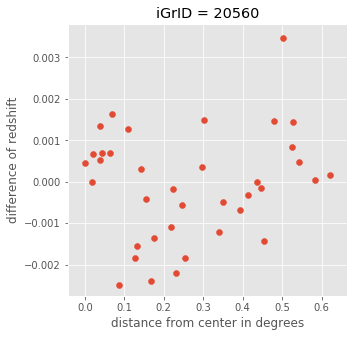

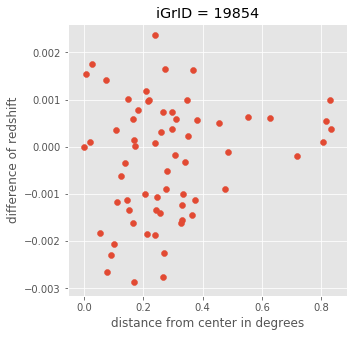

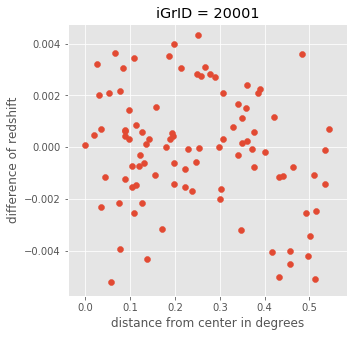

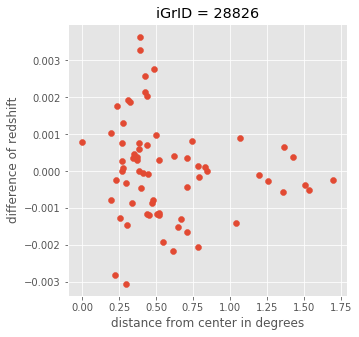

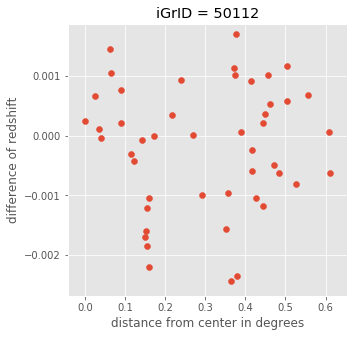

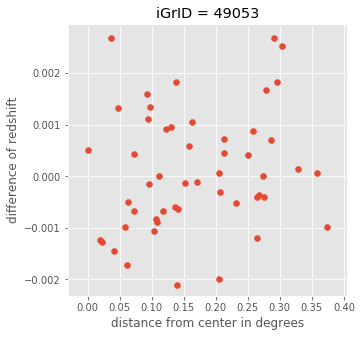

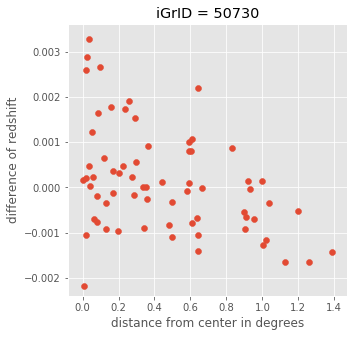

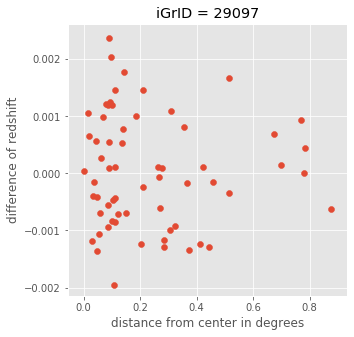

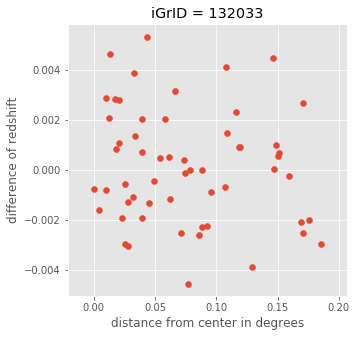

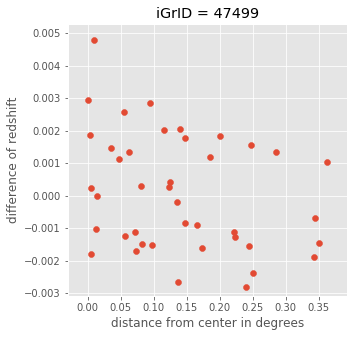

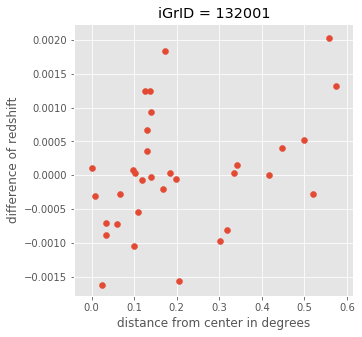

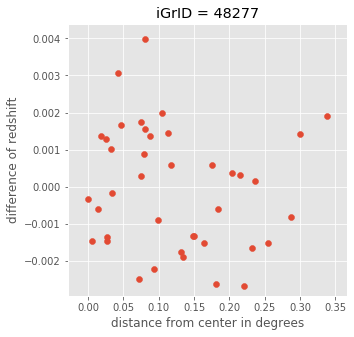

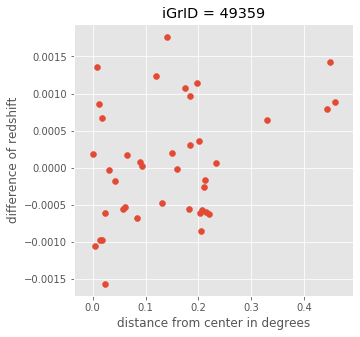

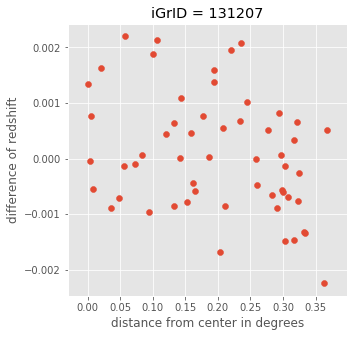

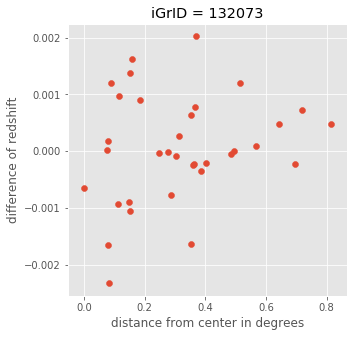

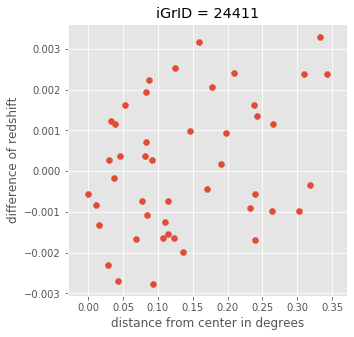

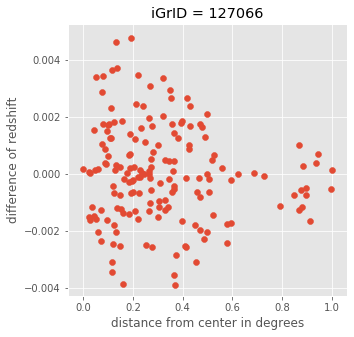

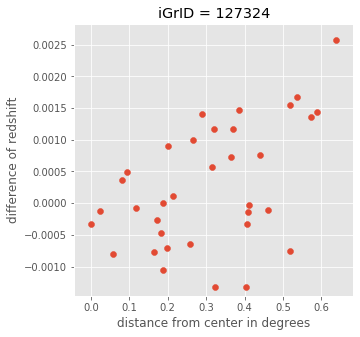

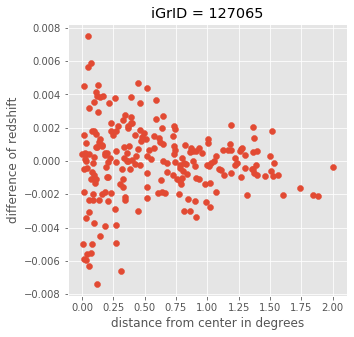

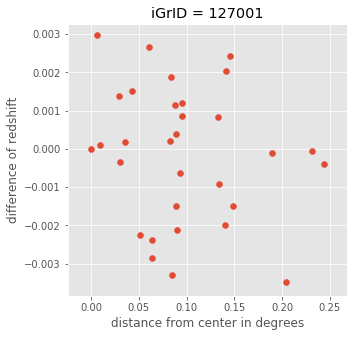

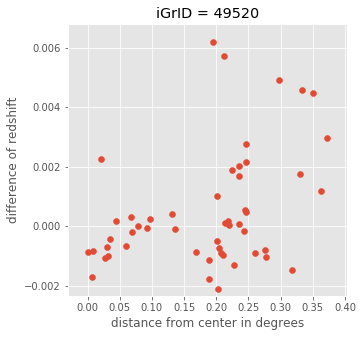

In [ ]:
for i in range(len(g_ids)):
    cur_group = g_s[g_s['iGrID'] == g_ids[i]]
    d = np.sqrt(((cur_group.RAJ2000_x - cur_group.RAJ2000_y)*(np.cos(cur_group.DEJ2000_x)))**2 + (cur_group.DEJ2000_x - cur_group.DEJ2000_y)**2)
    d_z = cur_group.z_x - cur_group.z_y
    plt.figure(figsize=(5,5))
    plt.scatter(d, d_z)
    plt.xlabel('distance from center in degrees')
    plt.ylabel('difference of redshift')
    plt.title('iGrID = %d' % (g_ids[i]))
    plt.ylim(top=max(d_z)*1.1, bottom=min(d_z)*1.1)
    plt.show()